In [6]:
import pyarrow.ipc as ipc

DATA_PATH = "/data-4/users/mileriso/datasets/"

# Replace 'your_file.arrow' with the path to your Arrow file
arrow_file = '/data-4/users/mileriso/datasets/VQAv2/arrows/vqav2_val.arrow'

# Read the Arrow file
with ipc.open_file(arrow_file) as reader:
    table = reader.read_all()

# Print the schema of the Arrow file
print(table.schema)

# Print the first few rows to inspect the data
print(table.to_pandas()[:15])

df = table.to_pandas()

# Select only the 'answers' and 'answer_labels' columns
table = df[['answers', 'answer_labels']]

# Convert the selected columns to a string
table_str = table[:50].to_string()

# Write the string to a text file
with open("table_original.txt", "w") as file:
    file.write(table_str)

image: binary
questions: list<item: string>
  child 0, item: string
answers: list<item: list<item: string>>
  child 0, item: list<item: string>
      child 0, item: string
answer_labels: list<item: list<item: int64>>
  child 0, item: list<item: int64>
      child 0, item: int64
answer_scores: list<item: list<item: double>>
  child 0, item: list<item: double>
      child 0, item: double
image_id: int64
question_id: list<item: int64>
  child 0, item: int64
split: string
__index_level_0__: int64
-- schema metadata --
pandas: '{"index_columns": ["__index_level_0__"], "column_indexes": [{"na' + 1309
                                                   image  \
17315  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...   
2331   b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...   
31450  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...   
30415  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...   
38674  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...   
38519  b'\xff\xd8\xff\xe0\x00\x10JFIF\

The question is ['Are both men on the same team?', 'What color uniforms are the men wearing?', 'What is the man throwing?', 'What is the man holding?', 'What sport are they playing?', 'Where are the people playing?', "What color is the man's shirt?", 'What kind of activity are the people watching?', 'What color are their shorts?']
The answer is [['yes', 'no'], ['blue', 'blue and gray', 'purple'], ['frisbee'], ['frisbee'], ['frisbee'], ['outside', 'frisbee', 'outdoors', 'field'], ['blue', 'purple'], ['frisbee'], ['gray', 'silver']]
The answer label is [[3, 9], [13, 2280, 163], [7], [7], [7], [655, 7, 1360, 445], [13, 163], [7], [16, 60]]
The answer scores is [[1.0, 0.3], [0.6, 0.3, 1.0], [1.0], [1.0], [1.0], [0.6, 1.0, 0.3, 0.6], [1.0, 1.0], [1.0], [1.0, 0.3]]
(415, 602, 3)


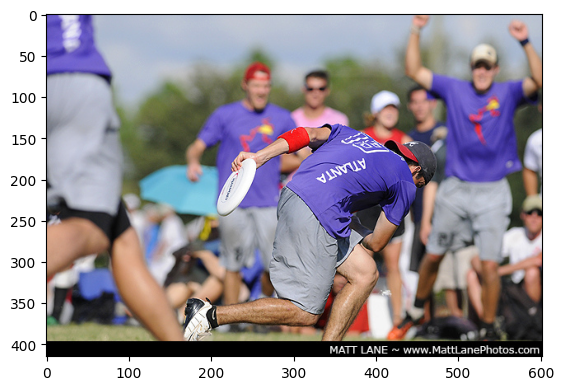

In [84]:
# Display the first image in the Arrow file
import matplotlib.pyplot as plt
import numpy as np
import io
from PIL import Image

data_selection = 2

print(f"The question is {table['questions'][data_selection].as_py()}")
print(f"The answer is {table['answers'][data_selection].as_py()}")
print(f"The answer label is {table['answer_labels'][data_selection].as_py()}")
print(f"The answer scores is {table['answer_scores'][data_selection].as_py()}")

# Get the first image from the Arrow file in bits
image_bytes = io.BytesIO(table["image"][data_selection].as_py())
image_bytes.seek(0)
image = Image.open(image_bytes).convert("RGB")

# Convert the image to a NumPy array
image = np.array(image)

print(image.shape)

# Display the image
plt.imshow(image)
plt.show()

In [5]:
import pyarrow.ipc as ipc

# Replace 'your_file.arrow' with the path to your Arrow file
arrow_file = '/data-4/users/mileriso/datasets/OOD/arrows/vqa_vlue_test.arrow'

# Read the Arrow file
with ipc.open_file(arrow_file) as reader:
    table = reader.read_all()

# # Print the schema of the Arrow file
# print(table.schema)

# # Print the first few rows to inspect the data
# print(table.to_pandas().head()[:20])
# Convert the table to a pandas DataFrame
# Convert the table to a pandas DataFrame
df = table.to_pandas()

# Select only the 'answers' and 'answer_labels' columns
table = df[['answers', 'answer_labels']]

# Convert the selected columns to a string
table_str = table[:50].to_string()

# Write the string to a text file
with open("table.txt", "w") as file:
    file.write(table_str)

The question is ['Are the pizzas cut?']
The answer is [['no']]
The answer label is [[1]]
The answer scores is [[1.0]]
(453, 604, 3)


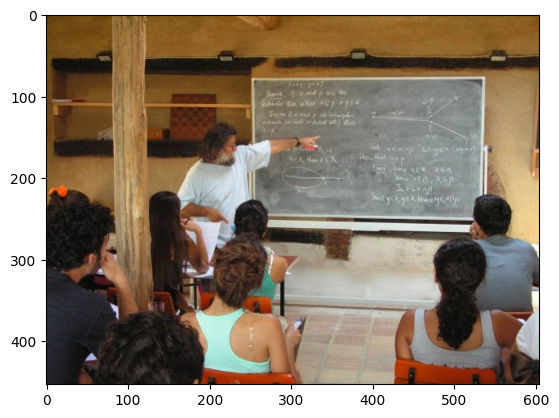

In [97]:
# Display the first image in the Arrow file
import matplotlib.pyplot as plt
import numpy as np
import io
from PIL import Image

data_selection = 10

print(f"The question is {table['questions'][data_selection].as_py()}")
print(f"The answer is {table['answers'][data_selection].as_py()}")
print(f"The answer label is {table['answer_labels'][data_selection].as_py()}")
print(f"The answer scores is {table['answer_scores'][data_selection].as_py()}")

# Get the first image from the Arrow file in bits
image_bytes = io.BytesIO(table["image"][0].as_py())
image_bytes.seek(0)
image = Image.open(image_bytes).convert("RGB")

# Convert the image to a NumPy array
image = np.array(image)

print(image.shape)

# # Reshape the image to the new shape
# image = image.reshape(3, 300, 318)

# Transpose the image to its original shape
# image = np.transpose(image, (2, 0, 1))

# Display the image
plt.imshow(image)
plt.show()

# Initialize the model

In [68]:
from meter.config import config, task_finetune_vqa_clip_bert, clip16, text_roberta, ood_vqa
from meter.modules import METERTransformerSS

_config = config()
_config.update(task_finetune_vqa_clip_bert())
_config["per_group_batch_size"] = 1
_config["data_root"] = "/data-4/users/mileriso/datasets/VQAv2/arrows"
_config["load_path"] = "/data-4/users/mileriso/models/meter_vqa.ckpt"
_config.update(clip16())
_config.update(text_roberta())
_config["image_size"] = 576
_config["test_only"] = True

model = METERTransformerSS(_config)

/data-4/users/mileriso/envs/.thesis/lib/python3.7/site-packages/torch/nn/functional.py:3063: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializi

In [69]:
from meter.modules.meter_utils import set_task
print(_config["image_size"])
set_task(model)
print(model.current_tasks)

576
['vqa']


# Prepare the dataset

In [114]:
from meter.datamodules.multitask_datamodule import MTDataModule

print(f"Initizing datamodule")
dm = MTDataModule(_config, dist=True)

# dm.prepare_data()
# dm.setup("test")

print(f"Datamodule created")

Initizing datamodule
DM DICTS: {'vqa': <meter.datamodules.vqav2_datamodule.VQAv2DataModule object at 0x70bbc3ff38d0>}
DM KEYS: dict_keys(['vqa'])
Datamodule created


The answer and question paair index is 16 and 1


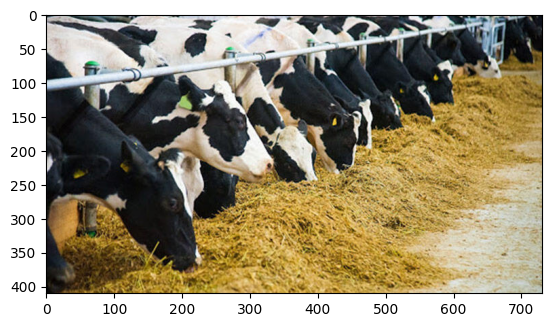

IndexError: index out of bounds

In [113]:
import torch
import urllib.request
import json
import random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Select a random question and image
data_selection = random.randint(0, len(table["questions"]))
question_selection = random.randint(0, len(table["answers"][data_selection]))
print(f"The answer and question paair index is {data_selection} and {question_selection}")

image_bytes = io.BytesIO(table["image"][data_selection].as_py())
image_bytes.seek(0)
image = Image.open(image_bytes).convert("RGB")
image = np.array(image)
# Plot the image
plt.imshow(image)
plt.show()

print(f"The question is {table['questions'][data_selection][question_selection].as_py()}")
print(f"The answer is {table['answers'][data_selection].as_py()}")


# convert the image to a tensor
img = torch.tensor(image).permute(2, 0, 1).unsqueeze(0).to(device)

# resize the image to the model's input size 576
img = torch.nn.functional.interpolate(
    img.float(), size=_config["image_size"], mode="bilinear", align_corners=False
)
img = img.unsqueeze(0)

with urllib.request.urlopen(
        "https://github.com/dandelin/ViLT/releases/download/200k/vqa_dict.json"
    ) as url:
        id2ans = json.loads(url.read().decode())

batch = {"text": [table["questions"][data_selection][question_selection].as_py()], "image": img}
model = model.to(device)


with torch.no_grad():
    encoded = dm.dms[0].tokenizer(batch["text"])
    batch["text_ids"] = torch.tensor(encoded["input_ids"]).to(device)
    batch["text_labels"] = torch.tensor(encoded["input_ids"]).to(device)
    batch["text_masks"] = torch.tensor(encoded["attention_mask"]).to(device)
    # batch = {k: v.to(device) for k, v in batch}
    infer = model.infer(batch)
    vqa_logits = model.vqa_classifier(infer["cls_feats"])

answer = id2ans[str(vqa_logits.argmax().item())]

print(f"The answer is {answer}")

In [1]:
my_list = ['yes', 'no', 'yes', 'no', 'standing', 'brown', 'white', 'orange', 'yes', 'no', 'yes', 'no', 'tree', 'no', 'yes', 'grass', 'high', 'low', 'yes', 'no', 'car', 'outdoor', 'indoor', 'bottle', 'glass', 'man', 'boy', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'food', 'rose', 'black', 'yellow', 'yes', 'no', 'no', 'yes', 'car', 'red', 'green', 'yes', 'no', 'plate', 'pan', 'lion', 'white', 'blue', 'orange juice', 'yes', 'no', 'yes', 'no', 'white', 'yellow', 'yes', 'no', 'windowsill', 'water', 'yes', 'no', 'square', 'whole', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'cup', 'bottle', 'yes', 'no', 'wood', 'dress', 'jeans', 'red', 'silver', 'yes', 'no', 'hand', 'air', 'no', 'yes', 'yes', 'no', 'white', 'black', 'yes', 'no', 'green', 'purple', 'leaves', 'plate', 'street', 'beach', 'yes', 'no', 'basketball', 'yellow', 'color', 'no', 'yes', 'yes', 'no', 'white', 'black', 'black', 'green', 'yes', 'no', 'horizontal', 'vertical', 'no', 'yes', 'yes', 'no', 'many', 'tree', 'grass', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'elephant', 'people', 'white', 'yellow', 'grind', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'field', 'hand', 'kitchen', 'field', 'yes', 'no', 'tree', 'table', 'tree', 'dessert', 'ice cream', 'yes', 'no', 'yes', 'no', 'water', 'wood', 'wood', 'metal', 'red', 'blue', 'yes', 'no', 'show', 'stone', 'wood', 'no', 'yes', 'hand', 'ground', 'red', 'blue', 'field', 'market', 'machine', 'cow', 'shelf', 'yes', 'no', 'yellow', 'brown', 'yes', 'no', 'stand', 'red', 'pink', 'fruit', 'rice', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'cloud', 'yes', 'no', 'outdoor', 'indoor', 'no', 'yes', 'brown', 'pink', 'watermelon', 'green and red', 'black', 'yes', 'no', 'red', 'white', 'cow', 'sheep', 'round', 'rectangle', 'palm', 'branch', 'no', 'yes', 'metal', 'plastic', 'many', 'boy', 'girl', 'brown', 'tractor', 'white', 'yellow', 'closed', 'open', 'silver', 'bronze', 'yes', 'no', 'red', 'gray', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'white', 'pink', 'blue', 'gray', 'red', 'white', 'iron', 'wood', 'right', 'left', 'brown', 'red', 'car', 'tree', 'white', 'orange', 'yes', 'no', 'no', 'yes', 'metal', 'no', 'yes', 'cup', 'box', 'yellow', 'white', 'yes', 'no', 'no', 'yes', 'grass', 'cage', 'no', 'orange', 'black and white', 'yes', 'no', 'table', 'people', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yellow', 'green', 'butterfly', 'no', 'yes', 'white', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'man', 'woman', 'no', 'yes', 'yes', 'no', 'white', 'pink', 'cloth', 'hand', 'students', 'yes', 'no', 'piano', 'keyboard', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'bright', 'square', 'yellow', 'red', 'no', 'yes', 'yes', 'no', 'road', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'pots', 'brass', 'yes', 'no', 'coconut', 'orange', 'yellow', 'white', 'yes', 'no', 'yellow', 'blue', 'yes', 'no', 'scenery', 'yes', 'no', 'woman', 'man', 'yes', 'no', 'yellow', 'red', 'yes', 'no', 'red', 'pink', 'yes', 'no', 'cup', 'yes', 'no', 'outside', 'no', 'yes', 'no', 'yes', 'cigarettes', 'yes', 'no', 'yes', 'no', 'bowl', 'sitting', 'standing', 'table', 'plate', 'lying down', 'down', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'many', 'no', 'yes', 'walk', 'plate', 'yes', 'no', 'tree', 'white', 'brown', 'no', 'yes', 'lake', 'grass', 'no', 'yes', 'down', 'yes', 'no', 'kid', 'yes', 'no', 'green', 'white', 'hand', 'table', 'no', 'yes', 'walking', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'plate', 'brown', 'yellow', 'yes', 'no', 'white', 'gray', 'play', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'night', 'daytime', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'man', 'cauliflower', 'yes', 'no', 'yes', 'no', 'pink', 'black and white', 'day', 'evening', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'ground', 'roof', 'no', 'yes', 'land', 'shoulder', 'brown', 'white', 'right', 'left', 'no', 'yes', 'no', 'yes', 'many', 'blue', 'yellow and black', 'leaves', 'basket', 'sofa', 'hand', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'silver', 'white', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'cup', 'bottle', 'yes', 'no', 'man', 'woman', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'person', 'yes', 'no', 'standing', 'eating', 'outdoor', 'pan', 'vegetable', 'yes', 'no', 'plaid', 'brown', 'black', 'yes', 'no', 'box', 'brown', 'white', 'no', 'yes', 'yes', 'no', 'many', 'jar', 'cup', 'field', 'hand', 'painting', 'standing', 'sitting', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'hand', 'table', 'yes', 'no', 'left', 'right', 'red', 'yellow', 'yes', 'no', 'yes', 'no', 'outside', 'yes', 'no', 'photograph', 'white and red', 'pink', 'yes', 'no', 'purple', 'white', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'cage', 'no', 'yes', 'leaves', 'bottle', 'no', 'yes', 'many', 'wall', 'face', 'no', 'yes', 'child', 'no', 'yes', 'many', 'no', 'yes', 'plant', 'nothing', 'eating', 'air', 'hand', 'pink', 'red', 'yellow and green', 'white and orange', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'road', 'grass', 'no', 'yes', 'adults', 'child', 'many', 'woman', 'man', 'no', 'yes', 'no', 'yes', 'lemon', 'fish', 'table', 'bowl', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'green', 'silver', 'yes', 'no', 'table', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'woman', 'man', 'red', 'pink', 'dog', 'tree', 'yes', 'no', 'no', 'yes', 'brown', 'black and white', 'yes', 'no', 'yes', 'no', 'ground', 'computer', 'ground', 'shirt', 'yes', 'no', 'giraffe', 'no', 'yes', 'plants', 'man', 'woman', 'yes', 'no', 'stainless steel', 'ceramic', 'side', 'front', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'black', 'brown', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'many', 'no', 'yes', 'yes', 'no', 'yellow', 'white', 'bird', 'nothing', 'yes', 'no', 'glass', 'taking pictures', 'sink', 'toilet', 'no', 'yes', 'sitting', 'standing', 'container', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'hand', 'hair', 'yes', 'no', 'women', 'men', 'yes', 'no', 'many', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'bowl', 'red', 'white', 'yes', 'no', 'no', 'yes', 'walking', 'no', 'yes', 'red', 'white', 'yes', 'no', 'white', 'yes', 'no', 'garden', 'leg', 'bending', 'straight', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'grass', 'tree', 'no', 'yes', 'standing', 'yes', 'no', 'many', 'white', 'blue', 'no', 'yes', 'brown', 'white', 'brown', 'yellow', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'field', 'big', 'small', 'yes', 'no', 'stop', 'yes', 'no', 'yes', 'no', 'white', 'brown', 'yellow', 'blue', 'yes', 'no', 'no', 'yes', 'table', 'balcony', 'yes', 'no', 'no', 'yes', 'outside', 'many', 'yes', 'no', 'no', 'yes', 'silver', 'notebook', 'paper', 'grass', 'snow', 'hand', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'cookies', 'leaves', 'yes', 'no', 'green', 'red', 'yes', 'no', 'yes', 'no', 'field', 'room', 'yes', 'no', 'avocado', 'silver', 'blue', 'red', 'standing', 'no', 'yes', 'many', 'color', 'black', 'yellow', 'pink', 'yes', 'no', 'man', 'woman', 'left', 'right', 'outdoors', 'indoor', 'no', 'yes', 'plant', 'car', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'green', 'gray', 'blue', 'pink', 'red', 'red', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'land', 'yes', 'no', 'black', 'left', 'right', 'black and white', 'black', 'white', 'standing', 'green', 'red', 'green', 'yes', 'no', 'yes', 'no', 'cane', 'white', 'no', 'yes', 'yes', 'no', 'children', 'yes', 'no', 'fighting', 'sitting', 'mud', 'land', 'yellow', 'no', 'yes', 'blue', 'yellow', 'no', 'yes', 'yes', 'no', 'zoo', 'grass', 'no', 'yes', 'yes', 'no', 'people', 'yes', 'no', 'red', 'pink', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'green', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'nothing', 'food', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'black', 'white', 'bright', 'dark', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'white', 'brown', 'yes', 'no', 'yes', 'no', 'green', 'red', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'many', 'yellow', 'white', 'hand', 'cloth', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'paint', 'water', 'yes', 'no', 'standing', 'yes', 'no', 'green', 'red and white', 'no', 'yes', 'daytime', 'night', 'yellow and green', 'red', 'no', 'yes', 'yes', 'no', 'many', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'back', 'table', 'blue', 'water', 'land', 'indoor', 'outdoor', 'tray', 'hand', 'leaves', 'roof', 'black', 'silver', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'vase', 'rose', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'green', 'yellow', 'no', 'yes', 'green', 'black', 'white', 'red', 'yes', 'no', 'brown', 'white', 'watermelon', 'yes', 'no', 'tow', 'vegetables', 'fish', 'woman', 'man', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'adults', 'yes', 'no', 'yes', 'no', 'grapes', 'watermelon', 'woman', 'man', 'yes', 'no', 'watch tv', 'no', 'yes', 'no', 'yes', 'leaves', 'fruits', 'no', 'yes', 'no', 'modern', 'white', 'red', 'yes', 'no', 'many', 'woman', 'man', 'table', 'bottle', 'paper', 'wall', 'shower', 'bathtub', 'metal', 'stone', 'yes', 'no', 'purple', 'green', 'no', 'yes', 'yes', 'no', 'outdoor', 'indoor', 'tree', 'frame', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'red', 'green', 'pot', 'board', 'yes', 'no', 'no', 'yes', 'green', 'white', 'many', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'evening', 'day', 'nothing', 'woman', 'man', 'yes', 'no', 'front', 'under', 'mouth', 'nose', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'white', 'land', 'basket', 'black', 'no', 'yes', 'holding', 'no', 'yes', 'man', 'children', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'rough', 'black', 'stainless steel', 'glass', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'bottle', 'cup', 'ground', 'hand', 'woman', 'man', 'grass', 'wood', 'no', 'yes', 'yellow', 'red', 'metal', 'no', 'yes', 'orange', 'red', 'hawaiian', 'no', 'yes', 'no', 'yes', 'many', 'many', 'no', 'yes', 'cup', 'leaf', 'street', 'yard', 'yes', 'no', 'ground', 'water', 'stone', 'window', 'no', 'yes', 'no', 'yes', 'standing still', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'outdoor', 'bottle', 'cup', 'no', 'yes', 'no', 'yes', 'many', 'green', 'brown', 'yes', 'no', 'yes', 'no', 'black', 'white', 'yes', 'no', 'outside', 'indoor', 'yes', 'no', 'metal', 'stone', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'plastic', 'stainless steel', 'no', 'yes', 'yes', 'no', 'brown', 'yellow', 'mouth', 'nose', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'eating', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'man', 'woman', 'no', 'yes', 'no', 'yes', 'in his hand', 'no', 'yes', 'hand', 'outdoor', 'indoor', 'white', 'black', 'walking', 'nothing', 'yes', 'no', 'yes', 'no', 'red', 'yellow', 'no', 'yes', 'yes', 'no', 'white', 'gray and white', 'no', 'yes', 'child', 'no', 'yes', 'yes', 'no', 'wood', 'stainless steel', 'rice', 'man', 'woman', 'horizontal', 'no', 'yes', 'yes', 'no', 'nest', 'land', 'hand', 'no', 'yes', 'door', 'grass', 'no', 'yes', 'red', 'no', 'yes', 'yes', 'no', 'in his hand', 'ground', 'no', 'yes', 'red', 'yellow', 'square', 'yes', 'no', 'table', 'hand', 'yes', 'no', 'no', 'yes', 'tower', 'statue', 'yes', 'no', 'black and white', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'black', 'white and yellow', 'many', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'fork', 'knife and fork', 'stone', 'floor', 'yes', 'no', 'yes', 'no', 'white', 'yellow', 'black', 'purple', 'yellow', 'brown', 'yes', 'no', 'blue', 'green', 'leaf', 'grass', 'land', 'white', 'green', 'yes', 'no', 'yes', 'no', 'down', 'up', 'no', 'yes', 'field', 'indoor', 'yellow', 'green', 'nothing', 'ground', 'branch', 'curved', 'straight', 'yellow', 'gray', 'yellow', 'white', 'yellow', 'gray', 'no', 'yes', 'no', 'silver', 'black', 'outside', 'yes', 'no', 'orange', 'green', 'right', 'left', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'in his hand', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'white', 'red', 'yes', 'no', 'bowl', 'plate', 'pencil', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'shower', 'yes', 'no', 'no', 'yes', 'grass', 'man', 'woman', 'yes', 'no', 'red', 'black', 'bowl', 'jar', 'no', 'yes', 'yes', 'no', 'many', 'mouth', 'no', 'yes', 'nothing', 'book', 'yes', 'no', 'no', 'yes', 'yellow', 'green', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'white', 'no', 'yes', 'yellow', 'white', 'brown', 'copper', 'many', 'mountain', 'yes', 'no', 'fish', 'dragon', 'blue', 'black and white', 'white', 'plaid', 'no', 'yes', 'beach', 'zoo', 'shirt', 'stand', 'yes', 'no', 'green', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'food', 'black', 'pink', 'yes', 'no', 'women', 'soldiers', 'yes', 'no', 'holding', 'women', 'cows', 'green', 'yes', 'no', 'yes', 'no', 'yellow', 'green', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'nothing', 'no', 'yes', 'no', 'yes', 'soldier', 'green', 'red', 'yes', 'no', 'stand', 'yes', 'no', 'nothing', 'food', 'blue', 'red', 'yes', 'no', 'slippers', 'wood', 'stone', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'gray', 'stripe', 'no', 'yes', 'no', 'yes', 'many', 'no', 'yes', 'no', 'yes', 'white', 'silver', 'yellow and red', 'no', 'yes', 'yes', 'no', 'old', 'modern', 'no', 'yes', 'many', 'no', 'yes', 'yes', 'no', 'roof', 'many', 'brown', 'yes', 'no', 'yellow', 'black', 'yes', 'no', 'tree', 'table', 'yes', 'no', 'white', 'silver', 'white', 'yellow and black', 'arm', 'stairs', 'no', 'yes', 'brown', 'orange', 'vegetable', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'red', 'pink', 'yes', 'no', 'green', 'brown', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'board', 'plate', 'dry', 'wet', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'white', 'yellow', 'cooked', 'raw', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'pastry', 'no', 'yes', 'yellow', 'branches', 'no', 'yes', 'street', 'stairs', 'green', 'white', 'yes', 'no', 'no', 'yes', 'red', 'green', 'no', 'yes', 'indoor', 'outdoor', 'tulip', 'no', 'yes', 'black', 'white', 'yes', 'no', 'no', 'yes', 'bottle', 'cup', 'tile', 'wood', 'flowers', 'yes', 'no', 'indoor', 'outdoor', 'green', 'black', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'arm', 'water', 'brown', 'hand', 'stool', 'front', 'above', 'yes', 'no', 'no', 'yes', 'yellow', 'black and white', 'white and green', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'shower', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'food', 'woman', 'man', 'no', 'yes', 'ground', 'hand', 'wall', 'table', 'no', 'yes', 'inside', 'outside', 'woman', 'man', 'no', 'yes', 'sitting', 'walking', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'white', 'no', 'yes', 'green', 'white', 'no', 'yes', 'no', 'yes', 'blue', 'white', 'blue', 'black', 'bright', 'carpet', 'bank', 'white', 'black', 'yes', 'no', 'yes', 'no', 'hand', 'branch', 'green', 'black', 'daytime', 'evening', 'man', 'woman', 'yes', 'no', 'tree', 'ground', 'man', 'woman', 'yes', 'no', 'no', 'yes', 'green', 'yellow', 'sitting', 'standing', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'tree', 'table', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'green', 'purple', 'woman', 'man', 'field', 'blue', 'white', 'no', 'yes', 'no', 'yes', 'woman', 'man', 'yes', 'no', 'table', 'hand', 'wall', 'face', 'pink and yellow', 'white and yellow', 'no', 'yes', 'yes', 'no', 'pink', 'white', 'brown', 'green', 'black', 'black', 'pink', 'brown', 'white', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yellow', 'white', 'yes', 'no', 'black', 'purple', 'yes', 'no', 'pink', 'red', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'trees', 'bricks', 'no', 'yes', 'stove', 'table', 'yes', 'no', 'yes', 'no', 'church', 'yes', 'no', 'yes', 'no', 'purple', 'red', 'black', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'black', 'brown', 'yes', 'no', 'yes', 'no', 'girl', 'boy', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'sheep', 'woman', 'yes', 'no', 'no', 'yes', 'fresh', 'silver', 'red', 'yes', 'no', 'standing', 'lying down', 'gray', 'no', 'yes', 'adult', 'children', 'yes', 'no', 'yes', 'no', 'woman', 'man', 'yes', 'no', 'yes', 'no', 'man', 'woman', 'no', 'yes', 'stand', 'lying down', 'no', 'yes', 'yes', 'no', 'outdoor', 'indoor', 'pencil', 'bowl', 'floor', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'black', 'red', 'no', 'yes', 'yellow', 'yes', 'no', 'man', 'woman', 'yes', 'no', 'no', 'yes', 'bowl', 'finger', 'yes', 'no', 'yes', 'no', 'modern', 'green', 'red and white', 'side', 'child', 'adults', 'yes', 'no', 'yes', 'no', 'pan', 'tree', 'human', 'elephants', 'no', 'yes', 'no', 'yes', 'cauliflower', 'flower', 'standing', 'yes', 'no', 'design', 'white', 'yard', 'house', 'eat', 'play', 'yes', 'no', 'red and yellow', 'red and white', 'field', 'in his hand', 'animal', 'people', 'many', 'indoor', 'outdoor', 'wall', 'paper', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'white', 'purple', 'black and white', 'no', 'yes', 'yes', 'no', 'table', 'no', 'yes', 'no', 'yes', 'spoon', 'nothing', 'no', 'yes', 'cup', 'plate', 'green', 'orange', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'white', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'white', 'gray', 'yes', 'no', 'no', 'yes', 'basket', 'plate', 'nothing', 'wall', 'paper', 'no', 'yes', 'shirt', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'food', 'flowers', 'steps', 'table', 'right', 'front', 'yes', 'no', 'no', 'yes', 'pink', 'red', 'many', 'water', 'yellow', 'green', 'selling', 'yes', 'no', 'no', 'yes', 'home', 'no', 'yes', 'no', 'yes', 'drawing', 'classic', 'no', 'yes', 'yes', 'no', 'outside', 'inside', 'yes', 'no', 'gray', 'brown', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'soup', 'salad', 'pink', 'red', 'yes', 'no', 'nothing', 'no', 'yes', 'stick', 'shoulder', 'garlic', 'onion', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'short', 'long', 'basket', 'yes', 'no', 'no', 'yes', 'yellow', 'red', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'white', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'square', 'pot', 'bamboo', 'metal', 'board', 'hand', 'many', 'no', 'yes', 'blue', 'no', 'yes', 'toilet', 'bathtub', 'no', 'yes', 'dirty', 'nobody', 'man', 'yes', 'no', 'yes', 'no', 'blue', 'many', 'eating', 'walking', 'woman', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'plate', 'walk', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yellow', 'green', 'no', 'yes', 'no', 'yes', 'men', 'women', 'yes', 'no', 'many', 'shower', 'bathtub', 'white', 'purple', 'no', 'yes', 'plastic', 'wooden', 'white', 'brown', 'shoulder', 'cage', 'soldiers', 'square', 'many', 'woman', 'man', 'dirty', 'clean', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'woman', 'child', 'yes', 'no', 'grass', 'water', 'no', 'yes', 'no', 'yes', 'steps', 'snow', 'ground', 'hand', 'yellow', 'silver', 'red', 'white', 'yes', 'no', 'white', 'pink', 'trees', 'green', 'red', 'wine', 'drinks', 'yes', 'no', 'no', 'yes', 'brown', 'white', 'no', 'yes', 'metal', 'ceramic', 'yellow', 'white', 'box', 'silver', 'no', 'yes', 'yes', 'no', 'red', 'black', 'no', 'yes', 'white', 'brown', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yellow', 'green', 'yes', 'no', 'children', 'nobody', 'yes', 'no', 'green', 'black', 'indoor', 'yes', 'no', 'stone', 'river', 'yes', 'no', 'no', 'yes', 'tea', 'no', 'yes', 'white', 'no', 'yes', 'white', 'black', 'ground', 'plate', 'pot', 'color', 'white', 'yes', 'no', 'lying down', 'yes', 'no', 'no', 'many', 'yes', 'no', 'black', 'brown', 'square', 'no', 'yes', 'plant', 'yes', 'no', 'white', 'brown', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'left', 'right', 'red', 'blue', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'woman', 'man', 'no', 'yes', 'metal', 'stone', 'sitting', 'lying down', 'sofa', 'yes', 'no', 'white', 'black', 'no', 'yes', 'green', 'purple', 'no', 'yes', 'standing', 'yes', 'no', 'modern', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'corn', 'carrot', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'many', 'purple', 'yellow', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'clean', 'dirty', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'green', 'yellow', 'red', 'black', 'yes', 'no', 'yes', 'no', 'green', 'red', 'garden', 'hand', 'shelf', 'bowl', 'plate', 'woman', 'yes', 'no', 'white', 'yellow', 'yes', 'no', 'yes', 'no', 'parking', 'no', 'yes', 'many', 'many', 'tree', 'basket', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'down', 'red', 'white', 'many', 'jar', 'pan', 'black', 'silver', 'all', 'yes', 'no', 'no', 'yes', 'red', 'green', 'no', 'yes', 'woman', 'man', 'yes', 'no', 'white', 'no', 'yes', 'no', 'yes', 'yellow', 'white', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'purple', 'white', 'white', 'purple', 'no', 'yes', 'no', 'yes', 'pink', 'orange', 'yes', 'no', 'white', 'purple', 'no', 'yes', 'no', 'yes', 'many', 'cow', 'woman', 'red', 'blue', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'standing', 'squatting', 'lying down', 'no', 'yes', 'black', 'orange', 'branch', 'ground', 'glass', 'standing', 'no', 'yes', 'yes', 'no', 'white', 'red', 'brown', 'red', 'yes', 'no', 'blue', 'red', 'pan', 'ship', 'branches', 'green and white', 'red and white', 'red', 'silver', 'yes', 'no', 'yes', 'no', 'man', 'woman', 'no', 'yes', 'bowl', 'pan', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'standing', 'flying', 'no', 'yes', 'yes', 'no', 'standing', 'black', 'yellow', 'no', 'yes', 'bottle', 'cup', 'standing', 'human', 'yes', 'no', 'pot', 'cow', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'red', 'pink', 'blue', 'yellow', 'hand', 'land', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'white and red', 'white and green', 'red', 'black', 'yes', 'no', 'yes', 'no', 'ride', 'no', 'yes', 'paper', 'woman', 'man', 'cheese', 'ground', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'pink', 'yellow', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'working', 'hand', 'box', 'green', 'yellow', 'red', 'green', 'yes', 'no', 'no', 'yes', 'brown and black', 'black', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'lemon', 'no', 'yes', 'yes', 'no', 'inside', 'outside', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'towel', 'photo', 'no', 'yes', 'brown', 'green', 'pink', 'white', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'hair', 'plant', 'adults', 'adults', 'children', 'yes', 'no', 'yes', 'no', 'drawing', 'makeup', 'no', 'yes', 'no', 'yes', 'field', 'container', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'purple', 'green', 'yes', 'no', 'hand', 'shelf', 'no', 'yes', 'farmers', 'yes', 'no', 'face', 'finger', 'rice', 'meat', 'back', 'side', 'blue', 'pink', 'outdoor', 'indoor', 'yes', 'no', 'yes', 'no', 'yes', 'white', 'yellow', 'yes', 'no', 'blue', 'orange', 'no', 'yes', 'no', 'yes', 'cup', 'jar', 'plate', 'tree', 'black and white', 'yellow', 'yes', 'no', 'no', 'yes', 'brown', 'yes', 'no', 'no', 'yes', 'pull', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'stainless steel', 'ceramic', 'white', 'red', 'no', 'yes', 'yes', 'no', 'fly', 'yes', 'no', 'no', 'yes', 'red', 'green', 'yes', 'no', 'ground', 'table', 'cloth', 'yes', 'no', 'no', 'yes', 'gray', 'red', 'yes', 'no', 'no', 'yes', 'man', 'woman', 'green', 'purple', 'yes', 'no', 'peace', 'war', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yellow', 'red', 'yes', 'no', 'white', 'purple', 'man', 'woman', 'yes', 'no', 'yes', 'no', 'straw', 'yes', 'no', 'pot', 'yes', 'no', 'field', 'yes', 'no', 'english', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'man', 'woman', 'run', 'jump', 'plow', 'tractor', 'yes', 'no', 'pan', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'tree', 'basket', 'pink', 'red', 'yes', 'no', 'yes', 'no', 'avocado', 'no', 'yes', 'snow', 'land', 'yes', 'no', 'tree', 'ground', 'yes', 'no', 'white', 'red', 'hand', 'ground', 'white', 'yellow', 'christmas tree', 'food', 'no', 'yes', 'white', 'orange', 'red and green', 'red', 'red', 'green', 'yes', 'no', 'ceramic', 'yellow', 'yes', 'no', 'white', 'color', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'many', 'no', 'yes', 'yes', 'no', 'white', 'black', 'yes', 'no', 'stainless steel', 'plastic', 'yes', 'no', 'yes', 'no', 'pepper', 'salad', 'red', 'green', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'brown', 'green and black', 'yes', 'no', 'yes', 'no', 'woman', 'man', 'ceramic', 'ground', 'hand', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'orange', 'white', 'no', 'yes', 'square', 'glass', 'no', 'yes', 'water', 'land', 'green', 'black and white', 'clean', 'dirty', 'lying down', 'no', 'yes', 'white', 'pink', 'orange', 'red', 'branches', 'car', 'indoor', 'no', 'yes', 'yes', 'no', 'plastic', 'glass', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'eating', 'white', 'yellow', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'tree', 'table', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'white', 'child', 'yes', 'no', 'no', 'yes', 'woman', 'man', 'stainless steel', 'wooden', 'many', 'no', 'yes', 'yes', 'no', 'lemon', 'yes', 'no', 'play', 'yellow', 'plate', 'white', 'green', 'yes', 'no', 'nothing', 'food', 'yes', 'no', 'yes', 'no', 'vegetable', 'lemon', 'walking', 'red', 'silver', 'woman', 'man', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'woman', 'man', 'yes', 'no', 'yes', 'no', 'notebook', 'many', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'black', 'pink', 'yes', 'no', 'yes', 'no', 'brown', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'red', 'no', 'yes', 'no', 'yes', 'green', 'yellow', 'no', 'yes', 'yes', 'no', 'white', 'ground', 'grass', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'wooden', 'stainless steel', 'yes', 'no', 'red', 'green', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'mall', 'still', 'run', 'no', 'yes', 'standing', 'no', 'yes', 'blue', 'yes', 'no', 'no', 'standing', 'yes', 'no', 'no', 'yes', 'sheep', 'cow', 'green', 'red', 'no', 'yes', 'no', 'yes', 'people', 'elephant', 'yes', 'no', 'men', 'children', 'white', 'yellow', 'yes', 'no', 'metal', 'plastic', 'no', 'yes', 'yes', 'no', 'yellow', 'white', 'red', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'notebook', 'no', 'yes', 'no', 'yes', 'boy', 'girl', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'left', 'on', 'plate', 'leaves', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'brown', 'white', 'yes', 'no', 'road', 'cage', 'no', 'yes', 'no', 'yes', 'stew', 'nothing', 'children', 'men', 'purple', 'pink', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'green', 'blue', 'no', 'yes', 'white', 'black', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'table', 'tree', 'white', 'white and black', 'red', 'pink', 'no', 'yes', 'lying down', 'standing', 'brown', 'green', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'many', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'blue', 'black', 'no', 'yes', 'hard', 'soft', 'stand', 'dirty', 'clean', 'yes', 'no', 'yes', 'no', 'red', 'yes', 'no', 'field', 'water', 'no', 'yes', 'yes', 'no', 'basket', 'plate', 'triangle', 'no', 'yes', 'yes', 'no', 'buffalo', 'ahead', 'left', 'white', 'black', 'no', 'yes', 'long sleeve', 'no', 'yes', 'tree', 'standing', 'left', 'front', 'blue', 'pink', 'standing', 'sitting', 'no', 'yes', 'nothing', 'in his hand', 'pencil', 'flowers', 'milk', 'coffee', 'no', 'yes', 'yes', 'no', 'woman', 'children', 'yes', 'no', 'wall', 'table', 'yes', 'no', 'outdoor', 'no', 'yes', 'forward', 'cake', 'brush', 'yes', 'no', 'standing', 'no', 'yes', 'ground', 'yes', 'no', 'green', 'orange', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yellow', 'green', 'wood', 'rubber', 'floor', 'tree', 'yes', 'no', 'blue', 'black', 'yes', 'no', 'no', 'yes', 'river', 'mud', 'grass', 'pink', 'white', 'yes', 'no', 'walking', 'wall', 'paper', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'black', 'brown', 'left', 'front', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'stand', 'squatting', 'yes', 'no', 'run', 'stand', 'woman', 'children', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'cows', 'bucket', 'table', 'yes', 'no', 'forks', 'plate', 'leaves', 'yes', 'no', 'yes', 'no', 'lake', 'no', 'yes', 'no', 'yes', 'blue', 'white', 'hand', 'tree', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'many', 'squash', 'pumpkin', 'child', 'adult', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'hay', 'side', 'table', 'no', 'yes', 'no', 'yes', 'animal', 'woman', 'yes', 'no', 'yes', 'no', 'square', 'no', 'yes', 'outdoor', 'many', 'no', 'yes', 'yes', 'no', 'rice', 'bread', 'game', 'silver', 'white', 'no', 'yes', 'ostrich', 'giraffe', 'machine', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'cows', 'no', 'yes', 'no', 'yes', 'standing', 'red and green', 'silver', 'no', 'yes', 'solid', 'yes', 'no', 'pink', 'green', 'yellow', 'brown', 'ripe', 'raw', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'bowl', 'cup', 'yes', 'no', 'white', 'yellow', 'yes', 'no', 'pink', 'green', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'woman', 'man', 'walking', 'white', 'green', 'copper', 'stone', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'hand', 'table', 'no', 'yes', 'many', 'box', 'tree', 'red', 'yes', 'no', 'brown', 'no', 'yes', 'color', 'black', 'no', 'yes', 'standing', 'metal', 'plastic', 'yes', 'no', 'no', 'yes', 'black', 'green', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'indoor', 'outdoor', 'woman', 'man', 'no', 'yes', 'daytime', 'night', 'yes', 'no', 'silver', 'white', 'stainless steel', 'ceramic', 'yes', 'no', 'brown', 'white', 'grass', 'porcelain', 'yes', 'no', 'yes', 'no', 'jar', 'pot', 'no', 'yes', 'yellow', 'blue', 'blue', 'yes', 'no', 'yellow', 'blue', 'water', 'leaves', 'yellow', 'red', 'black and white', 'white', 'nothing', 'yes', 'no', 'paper', 'child', 'woman', 'bottle', 'shoulder', 'land', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'black', 'yellow', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'purple', 'orange', 'no', 'yes', 'cherry', 'women', 'man', 'yellow', 'brown', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'doubles', 'singles', 'tree', 'white', 'white and blue', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'table', 'tree', 'red', 'yes', 'no', 'yes', 'no', 'towel', 'yes', 'no', 'milk', 'coffee', 'no', 'yes', 'no', 'yes', 'inside', 'outside', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'standing', 'metal', 'wood', 'yes', 'no', 'yes', 'no', 'box', 'land', 'yes', 'no', 'no', 'yes', 'brown', 'white', 'many', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'green', 'yellow', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'ring', 'fly', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'onion', 'nothing', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'red', 'green', 'woman', 'man', 'yes', 'no', 'many', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'game', 'many', 'yes', 'no', 'tree', 'brick', 'yes', 'no', 'pink', 'yellow', 'yes', 'no', 'yes', 'no', 'pink', 'white', 'eat', 'brown', 'yes', 'no', 'yes', 'no', 'paper', 'wall', 'yellow', 'green', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'nest', 'ship', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yellow', 'green', 'tea', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'adult', 'child', 'yes', 'no', 'plate', 'green', 'blue', 'no', 'yes', 'pink', 'orange', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'chair', 'sofa', 'no', 'yes', 'yellow', 'woman', 'boy', 'free', 'control', 'tree', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'many', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'indoor', 'outdoor', 'orange', 'yellow', 'yes', 'no', 'yes', 'no', 'silver', 'orange', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'hand', 'table', 'no', 'yes', 'modern', 'green', 'red', 'car', 'bike', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'purple', 'blue', 'red', 'green', 'yes', 'no', 'sitting', 'yes', 'no', 'yes', 'no', 'books', 'yes', 'no', 'yes', 'no', 'rice', 'sushi', 'black and white', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'color', 'yes', 'no', 'yes', 'no', 'black', 'white', 'yes', 'no', 'no', 'yes', 'yellow', 'white', 'no', 'yes', 'pink', 'white', 'tomato', 'lemon', 'no', 'yes', 'standing', 'sitting', 'yes', 'no', 'green', 'brown', 'metal', 'yes', 'no', 'yes', 'no', 'black and white', 'gray', 'yes', 'no', 'long sleeve', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'avocado', 'yes', 'no', 'table', 'field', 'messy', 'no', 'yes', 'coconut', 'vegetables', 'black', 'color', 'red', 'green', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'tree', 'car', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'hand', 'yes', 'no', 'hand', 'no', 'yes', 'wall', 'paper', 'yes', 'no', 'white', 'yellow', 'yes', 'no', 'yes', 'no', 'plastic', 'metal', 'microphone', 'player', 'brown', 'purple', 'green', 'red', 'no', 'yes', 'glass', 'plastic', 'no', 'yes', 'standing', 'yes', 'no', 'yellow', 'brown', 'no', 'yes', 'yes', 'no', 'green', 'orange', 'yes', 'no', 'stainless steel', 'wooden', 'clear', 'yes', 'no', 'cage', 'outdoor', 'brown', 'dirty', 'clean', 'standing', 'red', 'green', 'yes', 'no', 'cup', 'fruits', 'no', 'yes', 'hand', 'drawer', 'no', 'yes', 'no', 'yes', 'red', 'yellow', 'standing', 'yes', 'no', 'water', 'no', 'yes', 'yes', 'no', 'running', 'hand', 'huge', 'in his hand', 'yes', 'no', 'yes', 'no', 'pink', 'white', 'yes', 'no', 'glass', 'plastic', 'white', 'pan', 'cart', 'bowl', 'no', 'yes', 'yes', 'no', 'yellow', 'white and yellow', 'yes', 'no', 'cart', 'walking', 'oil', 'food', 'no', 'yes', 'yes', 'no', 'sitting', 'farm', 'domestic', 'yes', 'no', 'indoor', 'outdoor', 'yes', 'no', 'no', 'yes', 'orange', 'white', 'flower', 'light', 'woman', 'man', 'green', 'orange', 'baseball cap', 'man', 'woman', 'wood', 'plate', 'run', 'ceramic', 'glass', 'grass', 'flowers', 'yes', 'no', 'women', 'men', 'no', 'yes', 'river', 'board', 'no', 'yes', 'yes', 'no', 'green', 'black', 'gray', 'white', 'yes', 'no', 'black', 'white', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'pink', 'white', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'people', 'book', 'woman', 'many', 'cane', 'tub', 'lake', 'yes', 'no', 'black', 'green', 'yes', 'no', 'many', 'hand', 'no', 'yes', 'no', 'yes', 'red', 'blue', 'orange', 'no', 'yes', 'cup', 'bowl', 'yes', 'no', 'short', 'high', 'warm', 'bright', 'yes', 'no', 'concrete', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'white', 'black', 'yes', 'no', 'yellow', 'white', 'many', 'orange', 'red', 'red', 'no', 'yes', 'yes', 'no', 'paper', 'rice', 'yes', 'no', 'square', 'round', 'white', 'green', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'many', 'white', 'pink', 'no', 'yes', 'yes', 'no', 'bathtub', 'toilet', 'yes', 'no', 'purple', 'green', 'closed', 'open', 'no', 'yes', 'yes', 'no', 'tree', 'basket', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'land', 'road', 'yes', 'no', 'many', 'yes', 'no', 'cage', 'water', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'many', 'yes', 'no', 'field', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'pumpkin', 'squash', 'yellow', 'pink', 'barbed wire', 'vertical', 'no', 'yes', 'yes', 'no', 'dessert', 'pot', 'yes', 'no', 'yes', 'no', 'black', 'red', 'stainless steel', 'ceramic', 'no', 'yes', 'pink', 'white', 'cup', 'jar', 'no', 'yes', 'yes', 'no', 'pot', 'red', 'white and brown', 'dome', 'blue', 'black', 'yes', 'no', 'tree', 'sitting', 'walking', 'no', 'yes', 'no', 'yes', 'building', 'books', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'ground', 'field', 'no', 'yes', 'daytime', 'night', 'yes', 'no', 'zucchini', 'pumpkin', 'yes', 'no', 'behind', 'purple', 'green', 'yes', 'no', 'plate', 'hand', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'many', 'yes', 'no', 'yes', 'no', 'white', 'red', 'no', 'yes', 'child', 'adults', 'shelf', 'pot', 'person', 'wood', 'no', 'yes', 'plate', 'no', 'yes', 'hand', 'shoulder', 'land', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'basket', 'pink', 'yellow', 'many', 'many', 'yes', 'no', 'many', 'green', 'yellow', 'no', 'yes', 'tree', 'table', 'red', 'orange', 'yes', 'no', 'grass', 'yes', 'no', 'sleep', 'lying down', 'container', 'field', 'yes', 'no', 'no', 'yes', 'woman', 'man', 'no', 'yes', 'yes', 'no', 'balcony', 'nothing', 'yes', 'no', 'man', 'grass', 'no', 'yes', 'many', 'no', 'yes', 'no', 'yes', 'standing', 'woman', 'man', 'no', 'yes', 'yes', 'no', 'people', 'green', 'red', 'no', 'yes', 'basket', 'field', 'tree', 'shelf', 'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yellow', 'black', 'vegetable', 'many', 'no', 'yes', 'brown', 'gray', 'yes', 'no', 'no', 'yes', 'rectangle', 'white', 'brown', 'no', 'yes', 'yes', 'no', 'porcelain', 'stainless steel', 'green', 'brown', 'bread', 'plates', 'many', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'green', 'red', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'basket', 'ocean', 'tree', 'table', 'hand', 'yes', 'no', 'night', 'daytime', 'purple', 'blue', 'no', 'yes', 'woman', 'man', 'white', 'red', 'gray', 'bronze', 'yes', 'no', 'yellow', 'orange', 'ground', 'air', 'hand', 'glass', 'ceramic', 'no', 'yes', 'woman', 'man', 'yes', 'no', 'yes', 'no', 'ceramic', 'glass', 'yes', 'no', 'no', 'yes', 'outdoor', 'indoor', 'lying down', 'sitting', 'stand', 'yes', 'no', 'yes', 'no', 'white', 'orange', 'no', 'yes', 'container', 'field', 'tree', 'table', 'no', 'yes', 'no', 'yes', 'ceramic', 'glass', 'no', 'yes', 'yes', 'no', 'sheep', 'goat', 'no', 'yes', 'white and yellow', 'black', 'no', 'field', 'outdoor', 'indoor', 'child', 'adults', 'child', 'man', 'yes', 'no', 'no', 'yes', 'in his hand', 'indoor', 'outdoor', 'nobody', 'pink', 'yellow', 'many', 'yes', 'no', 'no', 'yes', 'nothing', 'yes', 'no', 'yes', 'no', 'food', 'nothing', 'white', 'yes', 'no', 'white', 'brown', 'yes', 'no', 'taking pictures', 'white', 'black', 'yes', 'no', 'pink', 'green', 'no', 'yes', 'in his hand', 'yes', 'no', 'yes', 'no', 'green', 'red', 'plain', 'plaid', 'no', 'yes', 'white', 'pink', 'no', 'yes', 'plate', 'basket', 'no', 'yes', 'no', 'yes', 'smoking', 'yes', 'no', 'hand', 'table', 'indoor', 'outdoor', 'no', 'yes', 'yes', 'no', 'many', 'night', 'daytime', 'many', 'night', 'daytime', 'no', 'yes', 'yellow', 'green', 'yes', 'no', 'yes', 'no', 'plate', 'plant', 'no', 'yes', 'white', 'blue', 'yes', 'no', 'yes', 'no', 'people', 'tree', 'no', 'yes', 'blue', 'no', 'yes', 'yes', 'no', 'women', 'man', 'yes', 'no', 'yes', 'no', 'ceramic', 'glass', 'white', 'red', 'yes', 'no', 'yes', 'no', 'monkey', 'empty', 'small', 'big', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'black', 'brown', 'tree', 'water', 'yes', 'no', 'men', 'woman', 'yes', 'no', 'black and white', 'brown', 'nothing', 'computer', 'yes', 'no', 'no', 'yes', 'computer', 'yes', 'no', 'yes', 'no', 'indoor', 'outdoors', 'laying', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'above', 'yes', 'no', 'no', 'yes', 'standing', 'no', 'yes', 'yes', 'no', 'night', 'daytime', 'lying down', 'walking', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'people', 'animal', 'juice', 'yes', 'no', 'standing', 'kneeling', 'yes', 'no', 'yes', 'no', 'woman', 'man', 'standing', 'white', 'red', 'table', 'hand', 'pink', 'white', 'circle', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'white', 'yellow', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'smile', 'yes', 'no', 'yes', 'no', 'pumpkin', 'yes', 'no', 'no', 'yes', 'field', 'palm trees', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'many', 'red', 'purple', 'yes', 'no', 'no', 'yes', 'left', 'front', 'yellow', 'white', 'many', 'red', 'pink', 'brass', 'pots', 'yes', 'no', 'yellow', 'green', 'yes', 'no', 'no', 'yes', 'people', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'gray', 'color', 'man', 'woman', 'rice', 'field', 'yes', 'no', 'no', 'yes', 'black', 'yes', 'no', 'pink and white', 'red', 'no', 'yes', 'table', 'book', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yellow', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'hand', 'table', 'black', 'gold', 'yes', 'no', 'little girl', 'yes', 'no', 'no', 'yes', 'pencil', 'brush', 'watermelon', 'fruits', 'child', 'man', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'red', 'black', 'red and white', 'pink', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'brown', 'white', 'hand', 'table', 'land', 'grass', 'yes', 'no', 'man', 'woman', 'yes', 'no', 'man', 'woman', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'closed', 'tractor', 'yes', 'no', 'stainless steel', 'ceramic', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'empty', 'no', 'yes', 'yes', 'no', 'leaf', 'paper', 'many', 'yes', 'no', 'no', 'yes', 'bow', 'no', 'yes', 'no', 'yes', 'square', 'round', 'yes', 'no', 'red', 'green', 'bright', 'black', 'purple', 'black', 'blue', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'boy', 'girl', 'no', 'yes', 'yes', 'no', 'birds', 'nothing', 'yes', 'no', 'standing', 'yes', 'no', 'no', 'yes', 'red', 'green', 'yes', 'no', 'many', 'no', 'yes', 'tree', 'no', 'yes', 'yes', 'no', 'white', 'yellow', 'green', 'blue', 'cup', 'no', 'yes', 'no', 'yes', 'blue', 'yellow', 'black', 'blue', 'basket', 'food', 'beer', 'people', 'eagle', 'pot', 'bowl', 'many', 'white', 'yellow', 'fighting', 'no', 'yes', 'black', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'paper', 'notebook', 'adult', 'children', 'field', 'container', 'yes', 'no', 'hand', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'computer', 'yes', 'no', 'white and brown', 'blue', 'plate', 'pot', 'yes', 'no', 'indoor', 'outdoor', 'yes', 'no', 'green', 'yellow', 'plate', 'hand', 'no', 'yes', 'metal', 'wooden', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'copper', 'wood', 'no', 'yes', 'no', 'yes', 'red', 'purple', 'trees', 'nothing', 'no', 'yes', 'no', 'yes', 'blue', 'yellow', 'khaki', 'white', 'green and red', 'black', 'blue and white', 'brown', 'inside', 'people', 'statue', 'many', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'box', 'table', 'no', 'yes', 'people', 'animal', 'no', 'yellow', 'purple', 'no', 'yes', 'no', 'yes', 'water', 'ship', 'plate', 'hand', 'ground', 'plate', 'yes', 'no', 'ground', 'fly', 'yes', 'no', 'thin', 'ground', 'no', 'yes', 'yes', 'no', 'english', 'coconut', 'onions', 'white', 'red', 'cake', 'nuts', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'people', 'elephant', 'yes', 'no', 'no', 'yes', 'many', 'no', 'yes', 'yes', 'no', 'white', 'yes', 'no', 'no', 'yes', 'palm tree', 'house', 'no', 'yes', 'park', 'white', 'red', 'grass', 'land', 'yes', 'no', 'yes', 'no', 'people', 'rectangle', 'no', 'yes', 'yes', 'no', 'many', 'no', 'yes', 'no', 'yes', 'orange', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'woman', 'man', 'no', 'yes', 'yes', 'no', 'white', 'red', 'pink', 'open', 'yes', 'no', 'child', 'no', 'yes', 'people', 'animal', 'no', 'yes', 'no', 'yes', 'upside down', 'forward', 'nothing', 'cloth', 'playing', 'holding', 'male', 'female', 'yellow', 'green', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'black', 'yes', 'no', 'yes', 'no', 'many', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'plate', 'leaf', 'no', 'yes', 'yes', 'no', 'long', 'short', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'orange', 'green', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'floor', 'carpet', 'green', 'orange', 'brown', 'yellow', 'yes', 'no', 'man', 'elephant', 'woman', 'man', 'grapes', 'watermelon', 'yellow', 'blue', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'white', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'many', 'no', 'yes', 'yes', 'no', 'metal', 'women', 'men', 'yes', 'no', 'women', 'black and white', 'white', 'yes', 'no', 'pink', 'red', 'square', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'lake', 'land', 'no', 'yes', 'yellow', 'brown', 'no', 'yes', 'many', 'no', 'yes', 'women', 'boy', 'table', 'paper', 'no', 'yes', 'yes', 'no', 'purple', 'pink', 'spoon', 'no', 'yes', 'yes', 'no', 'many', 'yes', 'no', 'woman', 'boy', 'white', 'black', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'right', 'left', 'no', 'yes', 'hand', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'hand', 'table', 'no', 'yes', 'ground', 'tree', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'children', 'adults', 'white', 'red', 'old', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'knife', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'flying', 'standing', 'yes', 'no', 'barrel', 'vegetables', 'adult', 'no', 'yes', 'ground', 'barn', 'no', 'yes', 'plate', 'pots', 'color', 'yellow', 'hand', 'backpack', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'many', 'yes', 'no', 'red', 'blue', 'hand', 'table', 'yes', 'no', 'brown', 'hand', 'indoor', 'outdoor', 'stone', 'many', 'pink', 'white', 'yes', 'no', 'peanuts', 'white', 'yes', 'no', 'brown', 'black', 'yes', 'no', 'yes', 'no', 'green', 'yellow', 'box', 'no', 'yes', 'slope', 'yellow', 'green', 'yes', 'no', 'man', 'girl', 'yes', 'no', 'no', 'yes', 'white', 'gray', 'standing', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'field', 'many', 'yellow', 'white', 'no', 'yes', 'english', 'nothing', 'yes', 'no', 'yes', 'no', 'white and brown', 'white', 'black', 'right', 'left', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'statue', 'no', 'yes', 'indoor', 'outdoor', 'no', 'yes', 'man', 'woman', 'no', 'yes', 'black', 'blue', 'cup', 'messy', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'white', 'pink', 'yes', 'no', 'right', 'left', 'plate', 'outdoor', 'indoor', 'no', 'yes', 'yes', 'no', 'yellow', 'green', 'eat', 'rice', 'yes', 'no', 'no', 'yes', 'pink', 'black and white', 'brown', 'no', 'yes', 'no', 'yes', 'white and pink', 'no', 'yes', 'white', 'orange', 'green', 'white', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'cut', 'man', 'woman', 'yes', 'no', 'many', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'plate', 'bowl', 'plate', 'hand', 'yes', 'no', 'red', 'blue', 'no', 'yes', 'yes', 'no', 'egg', 'meat', 'no', 'yes', 'man', 'woman', 'yes', 'no', 'pink', 'purple', 'market', 'square', 'no', 'yes', 'no', 'yes', 'pan', 'cup', 'basket', 'bowl', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'small', 'big', 'many', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'air', 'hand', 'no', 'yes', 'no', 'yes', 'dark', 'brown', 'silver', 'white', 'dog', 'remote control', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'air', 'land', 'white and yellow', 'black', 'no', 'yes', 'plastic', 'glass', 'red', 'purple', 'adults', 'children', 'plate', 'bag', 'ground', 'fire', 'black', 'boat', 'nest', 'green', 'yellow', 'silver', 'black', 'yes', 'no', 'yes', 'no', 'shower', 'silver', 'red', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'woman', 'children', 'yes', 'no', 'woman', 'children', 'soldiers', 'horses', 'stone', 'water', 'nobody', 'bar', 'no', 'yes', 'no', 'yes', 'hand', 'plate', 'yes', 'no', 'fruit', 'nothing', 'orange', 'gray', 'pink', 'red', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'lying down', 'nothing', 'cat', 'no', 'yes', 'knife', 'tomatoes', 'spoon', 'arm', 'shoulder', 'yellow', 'green', 'brown', 'red', 'no', 'yes', 'yellow', 'white', 'yes', 'no', 'red', 'pink', 'yes', 'no', 'almonds', 'lemon', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'plate', 'bowl', 'yes', 'no', 'no', 'yes', 'adult', 'yes', 'no', 'yes', 'no', 'vegetables', 'fruit', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'behind', 'right', 'bread', 'pancakes', 'yes', 'no', 'no', 'yes', 'bananas', 'leaves', 'outside', 'no', 'yes', 'red', 'blue', 'red', 'white', 'no', 'yes', 'yes', 'no', 'plate', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'bottle', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'hand', 'land', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'gray', 'blue', 'no', 'yes', 'yes', 'no', 'table', 'bowl', 'yellow', 'green', 'yes', 'no', 'man', 'woman', 'door', 'paper', 'yes', 'no', 'no', 'yes', 'green', 'white and red', 'grass', 'land', 'no', 'yes', 'no', 'yes', 'yellow', 'copper', 'barrel', 'cup', 'yes', 'no', 'yellow', 'red', 'no', 'yes', 'yes', 'no', 'many', 'no', 'yes', 'yes', 'no', 'many', 'wine', 'many', 'yes', 'no', 'dark', 'basketball', 'boy', 'girl', 'white', 'green', 'no', 'yes', 'yes', 'no', 'land', 'river', 'night', 'day', 'no', 'yes', 'straw', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'red', 'purple', 'cut', 'no', 'yes', 'outdoor', 'indoor', 'red', 'black', 'yes', 'no', 'white', 'yellow', 'many', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'many', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'woman', 'man', 'yes', 'no', 'white', 'black', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'leaves', 'plates', 'yes', 'no', 'people', 'no', 'yes', 'many', 'no', 'yes', 'many', 'hand', 'white', 'red', 'dishes', 'hand', 'yes', 'no', 'white', 'no', 'yes', 'girl', 'yes', 'no', 'yellow', 'woman', 'man', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'tree', 'night', 'daytime', 'yellow', 'green', 'no', 'yes', 'yes', 'no', 'red', 'white', 'no', 'yes', 'metal', 'wood', 'no', 'yes', 'food', 'nothing', 'yes', 'no', 'no', 'yes', 'land', 'grass', 'yes', 'no', 'white', 'pink', 'yes', 'no', 'yes', 'no', 'white', 'brown', 'many', 'no', 'yes', 'cup', 'stand', 'no', 'yes', 'land', 'white', 'pink', 'yellow', 'pink and white', 'food', 'nothing', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'flower', 'food', 'black', 'pink', 'river', 'grass', 'no', 'yes', 'yes', 'no', 'nothing', 'people', 'green', 'white', 'yes', 'no', 'yes', 'no', 'hand', 'table', 'purple', 'red and white', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'many', 'many', 'no', 'yes', 'no', 'yes', 'red', 'green and yellow', 'many', 'white', 'yellow', 'no', 'yes', 'man', 'woman', 'yes', 'no', 'play', 'fly', 'yellow', 'white', 'fried', 'no', 'yes', 'toilet', 'black', 'brown', 'nothing', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'purple', 'yellow', 'pink', 'white', 'no', 'yes', 'daytime', 'night', 'white', 'red', 'table', 'hand', 'indoor', 'outdoor', 'yes', 'no', 'yes', 'no', 'park', 'classroom', 'no', 'yes', 'women', 'boys', 'day', 'night', 'woman', 'man', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'many', 'brown and white', 'yellow', 'fruit', 'nothing', 'yes', 'no', 'many', 'bowl', 'plate', 'pen', 'flower', 'no', 'yes', 'green', 'yellow', 'no', 'yes', 'yes', 'no', 'rice', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'green', 'yellow', 'backpack', 'hand', 'yes', 'no', 'cucumber', 'white', 'pink', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'children', 'yes', 'no', 'left', 'right', 'yes', 'no', 'ceramic', 'stainless steel', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'left', 'right', 'black', 'brown', 'meat', 'yes', 'no', 'leg', 'ground', 'no', 'yes', 'red', 'green', 'red', 'green', 'ceramic', 'glass', 'yes', 'no', 'shirt', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'box', 'no', 'yes', 'yes', 'no', 'brown and black', 'brown', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'white', 'gray', 'vegetable', 'condiments', 'stand', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'hand', 'table', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yellow', 'white', 'hand', 'air', 'no', 'yes', 'nothing', 'no', 'yes', 'yes', 'no', 'many', 'platform', 'store', 'carrots', 'yellow', 'purple', 'no', 'yes', 'yes', 'no', 'many', 'many', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'sleeping', 'plastic', 'glass', 'yes', 'no', 'white', 'yellow', 'adult', 'child', 'yes', 'no', 'red', 'white', 'white', 'indoor', 'no', 'yes', 'no', 'yes', 'yellow', 'black', 'basket', 'tree', 'no', 'yes', 'woman', 'in his hand', 'beef', 'vegetables', 'yes', 'no', 'boy', 'girl', 'yes', 'no', 'yes', 'no', 'down', 'up', 'plate', 'kissing', 'red', 'white', 'grass', 'sky', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yellow', 'black', 'no', 'yes', 'paper', 'cup', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'green', 'yes', 'no', 'yes', 'no', 'hand', 'tractor', 'bowl', 'table', 'many', 'black', 'white', 'taking pictures', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'sky', 'wall', 'yes', 'no', 'indoor', 'outdoor', 'glass', 'ceramic', 'yes', 'no', 'green', 'white', 'black', 'red', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'nothing', 'yes', 'no', 'no', 'yes', 'tractor', 'no', 'yes', 'yellow', 'black', 'red', 'concrete', 'plate', 'shelf', 'green', 'white', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'water', 'street', 'vegetables', 'no', 'yes', 'blue and white', 'white', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'green', 'yellow', 'sitting', 'brown', 'black', 'plate', 'yes', 'no', 'yes', 'no', 'wild', 'home', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'indoor', 'outdoor', 'sofa', 'bed', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'square', 'many', 'no', 'yes', 'raw', 'cooked', 'plate', 'tree', 'nuts', 'fruits', 'yes', 'no', 'table', 'hand', 'clothes', 'yes', 'no', 'yes', 'no', 'outdoor', 'white', 'brown', 'yes', 'no', 'yes', 'no', 'children', 'adults', 'spoon', 'bottle', 'shopping', 'field', 'many', 'woman', 'man', 'green', 'yes', 'no', 'green', 'black', 'tree', 'basket', 'yes', 'no', 'market', 'field', 'many', 'front', 'behind', 'plate', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'bowl', 'gray', 'brown', 'no', 'yes', 'eating', 'running', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'fog', 'water', 'no', 'yes', 'animal', 'yes', 'no', 'gray', 'white', 'yes', 'no', 'man', 'woman', 'red', 'black', 'bottle', 'yes', 'no', 'yes', 'no', 'gray', 'white and black', 'stone', 'window', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'spoon', 'cup', 'yes', 'no', 'yes', 'no', 'black', 'orange', 'yes', 'no', 'rice', 'yes', 'no', 'white', 'yellow', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'red', 'green', 'meat', 'yellow', 'white', 'air', 'grass', 'yes', 'no', 'black', 'blue', 'many', 'white', 'white and pink', 'wool', 'nothing', 'vegetables', 'red', 'pink', 'shoulder', 'hand', 'wood', 'cutting board', 'pink', 'orange', 'no', 'yes', 'man', 'women', 'no', 'yes', 'standing', 'no', 'yes', 'bowl', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'each other', 'candy', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'plate', 'spoon', 'sitting', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'watermelon', 'cantaloupe', 'open', 'close', 'statue', 'yes', 'no', 'ground', 'basket', 'indoor', 'outdoor', 'red', 'blue', 'field', 'mud', 'brown', 'red', 'woman', 'man', 'yes', 'no', 'yes', 'no', 'print', 'no', 'yes', 'yes', 'no', 'small', 'big', 'yes', 'no', 'food', 'knife', 'yes', 'no', 'plate', 'basket', 'many', 'no', 'yes', 'yes', 'no', 'desktop', 'plate', 'yellow', 'white', 'tree', 'box', 'bookshelf', 'table', 'plastic', 'metal', 'box', 'feet', 'bottle', 'cup', 'square', 'round', 'river', 'road', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'house', 'carrot', 'tomatoes', 'nothing', 'plate', 'many', 'yes', 'no', 'white and black', 'gray', 'no', 'yes', 'no', 'yes', 'hand', 'plastic', 'stainless steel', 'no', 'yes', 'scissors', 'fruit', 'standing', 'flying', 'yes', 'no', 'yes', 'no', 'stand', 'plastic', 'stainless steel', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'red', 'yellow', 'no', 'yes', 'yes', 'no', 'flying', 'standing', 'no', 'yes', 'glass', 'plastic', 'no', 'yes', 'red and white', 'pink', 'no', 'yes', 'pink', 'yellow', 'outdoor', 'indoor', 'yes', 'no', 'yes', 'no', 'bottle', 'cup', 'yes', 'no', 'grapes', 'watermelon', 'sweater', 'bright', 'dark', 'no', 'yes', 'mall', 'restaurant', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'black', 'yellow', 'yellow', 'red', 'many', 'animal', 'yes', 'no', 'red', 'pink', 'bread', 'white', 'blue', 'ground', 'yes', 'no', 'yes', 'no', 'outside', 'inside', 'computer', 'chair', 'no', 'yes', 'cloudy', 'sunny', 'people', 'eagle', 'black', 'pink', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'child', 'woman', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'white', 'red', 'eat', 'basket', 'vegetables', 'many', 'diamond', 'square', 'nothing', 'grapes', 'front', 'left', 'red', 'yellow', 'plate', 'stone', 'metal', 'no', 'yes', 'red', 'yellow', 'black and white', 'white', 'front', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'green', 'yellow', 'white', 'brown', 'black', 'brown', 'black', 'bowl', 'leaves', 'straw', 'no', 'yes', 'vegetables', 'no', 'yes', 'pink', 'yellow', 'yes', 'no', 'water', 'boy', 'yellow', 'yes', 'no', 'no', 'yes', 'wood', 'stainless steel', 'no', 'yes', 'garlic', 'cucumber', 'yes', 'no', 'yes', 'no', 'paper', 'yes', 'no', 'standing', 'sitting', 'no', 'yes', 'yes', 'no', 'square', 'branches', 'shark', 'tuna', 'shopping', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'shopping', 'yes', 'no', 'white and yellow', 'yellow', 'red', 'green', 'no', 'yes', 'purple', 'pink', 'no', 'yes', 'bamboo', 'cement', 'green', 'white', 'air', 'grass', 'yellow', 'black', 'yes', 'no', 'wine glasses', 'stand', 'fly', 'yes', 'no', 'yes', 'no', 'bow', 'walk', 'fried', 'drinks', 'square', 'yes', 'no', 'barrel', 'no', 'yes', 'hand', 'ground', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'outside', 'snow', 'sunny', 'water', 'branch', 'many', 'white', 'white and pink', 'child', 'no', 'yes', 'statue', 'green', 'white', 'gray', 'white', 'sunglasses', 'earrings', 'no', 'yes', 'black', 'red', 'yes', 'no', 'yes', 'no', 'men', 'woman', 'nothing', 'shelf', 'yes', 'no', 'no', 'yes', 'many', 'yes', 'no', 'hotel', 'light', 'no', 'yes', 'many', 'yes', 'no', 'black', 'pink', 'pink and yellow', 'white', 'white and yellow', 'no', 'yes', 'black', 'white', 'no', 'yes', 'many', 'no', 'yes', 'plastic', 'glass', 'yes', 'no', 'yes', 'no', 'ice', 'outdoor', 'barrel', 'tree', 'cup', 'bottle', 'red', 'yellow', 'white', 'yellow', 'yes', 'no', 'cow', 'woman', 'bread', 'salad', 'hand', 'table', 'no', 'yes', 'yes', 'no', 'black', 'brown', 'red and yellow', 'black', 'purple', 'white', 'tree', 'plate', 'yellow', 'brown', 'yellow', 'no', 'yes', 'yes', 'no', 'pink', 'green', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'water', 'snow', 'yellow', 'white', 'yes', 'no', 'no', 'yes', 'many', 'white', 'black', 'market', 'hand', 'box', 'ground', 'hand', 'man', 'woman', 'bowl', 'table', 'above', 'under', 'noodles', 'yellow', 'black', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'bowl', 'plate', 'cheese', 'woman', 'man', 'table', 'hand', 'red', 'green', 'many', 'yes', 'no', 'yes', 'no', 'fountain', 'no', 'yes', 'meat', 'soup', 'eating', 'nothing', 'nothing', 'no', 'yes', 'elephants', 'people', 'yes', 'no', 'table', 'bag', 'field', 'mud', 'black and white', 'black', 'woman', 'man', 'stand', 'yes', 'no', 'no', 'yes', 'porcelain', 'stainless steel', 'yes', 'no', 'orange', 'white', 'yes', 'no', 'yes', 'no', 'many', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'tree', 'hand', 'hand', 'table', 'no', 'yes', 'woman', 'no', 'yes', 'music', 'no', 'yes', 'no', 'yes', 'fried', 'bowl', 'woods', 'yes', 'no', 'purple', 'green', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'square', 'no', 'yes', 'no', 'yes', 'bag', 'hand', 'blue', 'yes', 'no', 'left', 'right', 'food', 'cup', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'land', 'car', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'ground', 'shelf', 'no', 'yes', 'no', 'yes', 'standing', 'eating', 'square', 'land', 'plate', 'napkins', 'white', 'yellow', 'plate', 'mat', 'men', 'woman', 'ground', 'tree', '3', '8', 'multicolored', 'brown', 'wood', 'iron', 'store', 'in car', 'river', 'grass', 'black', 'green', '2', '1', 'food', 'nothing', 'green', 'red', 'nothing', 'car', '2', '1', 'cubs', 'lion', 'man', 'woman', '1', '2', '1', '2', 'juice', 'orange juice', 'seat', 'squatting', 'white', 'silver', 'brown', 'silver', '1', '4', 'brick', 'wood', '4', '1', '2', '1', 'cloth', 'table', 'cup', 'basketball', '4', '2', '1', '4', '4', 'many', 'tree', 'stand', '6', '1', 'yellow', 'black', '1', '3', '2', 'many', 'woman', 'man', '3', '1', '1', '3', 'stand', 'bow', 'cups', 'bottles', '18', '1', 'green', 'orange', '2', '1', '1', '2', '3', '1', 'watermelon', 'fruits', '13', '3', '1', '2', '2', '5', 'forest', 'cloud', 'milk', 'food', '5', '2', 'many', '1', 'gun', 'cane', '0', '1', '1', '2', 'short', 'long', 'brown', 'blue', 'animal', 'tractor', 'flat', 'vertical', 'running', 'standing', '2', '1', '7', '5', '0', '2', '1', '2', '3', '0', 'several', '1', 'branch', 'plate', 'many', 'little', '1', '2', '7', '12', '1', '7', 'yes', 'no', 'statue', 'painting', '1', '2', 'silver', 'white', '1', '2', 'table', 'arm', '4', '1', 'hanger', 'people', 'hat', 'no hat', '1', '3', 'multicolored', 'white', 'students', 'adult', '0', '3', 'black', 'white', 'square', 'round', '1', '7', '1', '6', '4', '2', 'standing', 'eating', '1', '4', 'washing', 'cooking', 'road', 'river', '4', '1', 'people', 'scenery', 'girl', 'boy', 'inside', 'outside', 'bowl', 'vines', 'pot', 'cup', 'many', '1', 'cigarettes', 'bag', '5', 'many', 'walk', 'sitting', 'bowl', 'plate', '3', '1', 'tree', 'board', '1', '2', 'up', 'down', '2', '5', 'young', 'kid', '3', '1', '1', '4', 'oval', 'round', '15', '2', '1', '3', 'black', 'gray', 'stand', 'plate', 'play', 'walk', '3', '8', 'standing', 'eating', '1', '3', '5', '3', '3', '1', 'many', '1', '1', '3', 'both', 'left', '4', '8', '6', '8', '2', '1', 'person', 'nothing', 'pizza', 'onion', '2', '4', 'old', 'new', '3', '6', 'cage', 'outdoor', 'yellow', 'white', 'in his hand', 'in box', 'white', 'black', 'outside', 'indoor', 'computer', 'counter', '2', 'many', 'tea', 'coffee', '4', '8', 'writing', 'painting', '0', '1', 'cage', 'field', 'adults', 'children', '1', 'many', '2', '1', 'playing', 'photograph', '1', '2', '1', '4', '1', '2', 'string', 'many', 'on tree', 'sliced', 'table', 'rack', '16', '3', 'many', '2', '7', '8', 'green', 'red', '3', '1', '3', '1', 'on tree', 'on table', 'computer', 'counter', 'cup', 'box', 'bag', 'ground', 'giraffe', 'deer', 'sweatshirt', 'shirt', 'ground', 'sky', 'writing', 'drawing', 'plant', 'on plate', '1', '2', '1', '4', 'horse', 'woman', 'on grass', 'on floor', '2', '3', 'bread', 'fruit', 'porcelain', 'glass', 'glass', 'ceramic', '3', '1', '3', 'many', 'hat', 'no hat', '1', 'many', 'leaning', 'lying down', 'container', 'on tree', '1', '0', 'black', 'yellow', '3', '1', '2', '1', 'many', '1', 'watching', 'working', 'plate', 'bowl', 'white and black', 'brown', '5', '2', 'clouds', 'sunrise', 'field', 'hand', 'field', 'grass', 'standing', 'sitting', '4', '2', '1', 'many', '2', '1', '1', '2', 'outside', 'indoor', 'lemonade', 'watermelon', '3', '2', '1', '3', 'stop', 'working', '1', '3', '1', '0', 'bed', 'hay', 'brass', 'silver', '1', 'many', 'in basket', 'in field', 'pot', 'plate', 'boy', 'man', '1', '2', 'hand', 'vines', '3', '1', '1', '13', 'silver', 'yellow', '1', '2', 'raw', 'ripe', 'on grass', 'shed', '1', '3', '6', '1', 'many', '7', 'standing', 'eating', '0', '6', '2', '9', 'water', 'field', '1', '2', '4', '2', '2', '1', 'raw', 'ripe', 'garden', 'street', 'working', 'eating', '6', '1', '1', '2', 'talking', 'listening', 'river', 'land', 'cooking', 'shopping', '2', '12', 'lemon', 'yogurt', 'cane', 'tub', '1', '9', 'white', 'blue and gray', 'sitting', 'standing', '7', '1', '0', '8', '8', '1', '12', '1', '1', '2', '0', '3', 'coffee', 'white', 'man', 'children', 'dry', 'fresh', '1', '2', '1', '8', '2', '20', '6', '1', 'men', 'women', 'yellow', 'green', '2', '5', 'many', '2', 'brick', 'wood', 'bright', 'dim', 'eating', 'standing', '2', '1', '5', '1', 'black', 'white', '1', 'many', '0', '11', 'nothing', 'knife', '0', '4', 'cloth', 'plate', '1', '5', 'sitting', 'bow', 'multicolored', 'blue', 'cluttered', 'clean', 'left', 'front', '1', '2', '0', '5', 'on ground', 'in water', '2', '0', 'many', '0', 'on tree', 'on table', '1', '5', '2', '3', '2', '0', 'short', 'long', 'children', 'adults', 'kettle', 'plate', '9', '2', '2', '1', '9', '1', 'women', 'man', '10', '0', '2', '1', 'right', 'left', 'black', 'silver', '2', '4', '3', '0', 'nighttime', 'daytime', '2', '4', '2', '1', '3', '1', '1', '2', '4', '12', '2', '0', '2', '1', '6', '1', 'ground', 'basket', '1', '2', '1', 'many', '1', '2', 'many', '2', '1', 'many', '2', '1', 'nothing', 'man', 'standing', 'eating', 'black', 'caramel', '2', '3', '5', '1', '2', '1', '2', '3', 'rough', 'modern', '1', '17', 'street', 'river', 'white', 'yellow', '2', '1', 'branch', 'banana', 'white', 'hawaiian', '3', '1', '10', '0', '2', '1', '1', '2', '2', '3', 'tile', 'metal', 'many', '1', 'cage', 'ground', '4', '8', 'sunglasses', 'mask', '3', '8', '2', 'many', '0', '4', 'old', 'new', '4', '3', 'outdoor', 'indoor', '1', '2', '1', '4', 'many', '2', '1', '6', 'close', 'far', '0', 'many', 'women', 'men', '3', '1', '3', '8', 'yellow', 'pink', '1', '2', '2', '1', '1', '8', 'alive', 'cooked', 'woman', 'nobody', '1', '2', '0', '4', 'sitting', 'eating', '11', '1', 'standing', 'sitting', 'man', 'cows', '2', '6', '2', '1', 'walking', 'eating', '2', '5', '3', '2', 'nothing', 'lines', 'branch', 'nest', 'clean', 'dirty', 'adult', 'child', '18', '5', 'noodles', 'rice', 'vertical', 'horizontal', '4', '8', 'on ground', 'in sky', '2', '1', '2', '1', 'red', 'blue', 'square', 'round', '1', '2', 'black and white', 'multicolored', '3', 'many', '4', '1', 'leaf', 'hand', '8', '3', 'woman', 'man', '4', '1', '1', '5', '3', '5', '15', '2', '1', '2', 'metal', 'glass', '3', '1', '1', '2', '6', '2', '2', '1', 'kitchen', 'table', '3', '0', 'inside', 'outside', 'cloth', 'plate', 'talking', 'playing', '2', '1', 'brown', 'white', '2', '1', '4', '2', '2', '1', 'bathtub', 'shower', '0', '3', '2', '0', '2', '0', 'mouth', 'store', '2', 'many', '2', '1', 't shirt', 'shirt', '1', '2', 'mountain', 'street', 'yard', 'arm', 'many', '5', '1', '3', 'listening', 'cooking', '2', '1', 'green and orange', 'green', '1', '3', 'many', '1', 'food', 'people', '1', '2', 'fighting', 'standing', 'grass', 'water', 'green', 'multicolored', '1', 'many', '1', '2', '4', '5', 'green and black', 'black', 'many', '2', '2', '1', 'black', 'khaki', 'in water', 'on grass', '8', '6', '1', '6', 'yellow and red', 'black and white', '3', '2', 'sitting', 'standing', '1', 'many', '3', '1', 'adults', 'children', '0', '2', '3', '4', 'many', '1', 'in field', 'on plate', 'inside', 'outside', 'roof', 'stairs', 'children', 'adults', '1', '4', '2', '1', '2', '0', '2', '1', 'down', 'up', 'candy', 'rose', '6', '14', 'pastry', 'milk', 'yellow', 'blue', 'leaves', 'trees', '1', 'many', '3', '8', '2', '0', 'blue', 'black', 'vines', 'cutting board', '10', '1', 'purple', 'pink', '2', '0', '4', '2', 'whole', 'half', '6', '5', 'glass', 'porcelain', 'cage', 'ground', '4', '0', '2', '1', 'yard', 'field', '4', '3', 'yellow', 'orange', 'bowl', 'food truck', 'bathtub', 'shower', 'field', 'stone', 'plain', 'multicolored', '1', '2', '0', 'many', 'red and blue', 'red and white', 'adult', 'child', 'plate', 'bowl', 'unknown', 'pare', '1', '3', 'man', 'woman', 'white', 'yellow', '4', '1', 'can', 'plate', 'ahead', 'left', '2', '1', 'branch', 'cage', '2', '3', '0', '5', '2', '1', 'sunny', 'snowy', 'raw', 'ripe', '1', '6', 'blue and red', 'red', '0', '2', '2', '1', '1', '2', 'brown', 'spotted', '3', '1', '2', '1', 'bucket', 'field', 'desktop', 'laptop', 'wet', 'dry', '2', '6', '2', '4', 'on grass', 'in water', '2', '1', '5', '1', 'bunk', 'single', 'no', 'yes', '8', '16', 'black', 'multicolored', '8', '1', 'on ground', 'in air', 'mask', 'nothing', '1', '2', 'dry', 'fresh', '6', '1', '2', '1', '1', '2', '3', '8', 'in car', 'garden', '4', '2', '2', '1', '2', '1', 'stones', 'on ground', 'stick', 'pencil', 'vines', 'floor', '1', '2', 'sitting', 'train', '1', '2', 'tile', 'bowl', 'antique', 'modern', 'plate', 'vines', 'brown', 'yellow', '1', '2', 'vegetables', 'fruits', 'can', 'cup', 'sitting', 'squatting', 'chase', 'stand', 'new', 'used', '4', '8', 'field', 'pen', 'in his hand', 'on ground', 'red', 'orange', 'many', '3', 'few', 'many', 'on shelf', 'on table', '1', '3', '16', '10', 'bank', 'field', 'cup', 'bottle', 'fish', 'leaf', '0', '2', 'silver', 'white', '3', '2', 'paper', 'notebook', '6', '1', '4', '2', '5', '1', 'nothing', 'nuts', '1', '4', '4', '6', '1', '2', '2', '1', 'shirt', 'sweatshirt', 'many', '1', '2', '1', '3', '1', 'woman', 'man', 'pencil', 'nothing', '4', '2', '2', '1', '3', '1', '0', '6', '2', '1', 'walking', 'sitting', 'home', 'in street', '17', '5', 'watermelon', 'lemon', 'in field', 'on ground', '1', '2', 'drawing', 'writing', '2', '6', 'kissing', 'smiling', '3', '0', '2', '1', '2', '1', '2', '11', '2', '0', 'chinese', 'western', 'outside', 'inside', 'basket', 'vines', 'chest', 'in box', '2', '1', '6', '1', '2', '1', '2', '1', 'bowl', 'nothing', 'balcony', 'stairs', 'round', 'square', 'pot', 'plate', '2', '0', 'white', 'purple', '4', '1', 'brown', 'white', '2', '1', '1', '5', 'clean', 'dirty', 'on water', 'on ground', 'watching', 'drinking water', '1', 'many', 'inside', 'outside', '2', '4', 'blue', 'red', 'walk', 'pasture', '1', 'many', 'vines', 'box', '4', '1', '1', '4', '5', '2', 'single', 'bunk', 'many', '1', '7', '3', 'many', '1', 'shop', 'shelf', '1', '3', 'gray', 'blue', 'square', 'cage', 'playing', 'holding', '4', '1', '10', '3', 'no', 'yes', '2', '5', 'on tray', 'on table', '1', '6', '1', '2', 'orange', 'coffee', 'cart', 'tree', '2', '1', 'woman', 'man', '1', '2', '1', '3', '2', '4', 'multicolored', 'white', 'outside', 'inside', 'outside', 'indoor', '4', '2', 'porcelain', 'metal', 'down', 'up', '12', '2', 'alive', 'dead', 'glass', 'porcelain', 'man', 'nobody', '2', '1', '0', '5', 'green', 'white', 'new', 'old', '2', '1', '4', '1', '5', '0', 'mouth', 'hand', 'box', 'table', 'cow', 'pig', 'container', 'plant', 'whole', 'cooked', '4', '1', 'square', 'round', '9', '2', '7', '1', '2', '8', 'wooden', 'stainless steel', '2', '1', '2', '1', 'open', 'close', '2', '3', 'men', 'children', '1', '2', '1', 'many', 'on plate', 'on tree', '7', '2', 'many', '5', 'many', 'few', '1', '2', 'lying down', 'standing', '1', '3', 'working', 'playing', 'garden', 'stands', 'in his hand', 'on ground', 'tree', 'plate', 'standing', 'sitting', 'model', 'woman', '7', '1', 'down', 'up', '4', '10', '2', '0', 'many', '1', '1', 'many', 'many', '6', 'nobody', 'all', 'outdoors', 'indoors', '2', '1', '0', '7', '1', '2', 'cut', 'whole', 'white', 'silver', 'mud', 'grass', 'in air', 'on ground', '2', '1', '1', 'many', 'many', '4', '3', '7', 'lying down', 'standing', 'shower curtain', 'glass', 'pink', 'white', 'many', '2', 'long', 'round', 'lying down', 'in his hand', 'many', '1', '3', '2', 'yard', 'cage', '8', '2', '3', '1', 'vertical', 'lying down', 'woods', 'bricks', '1', '2', 'leaves', 'sauce', '5', '1', 'container', 'tree', 'branch', 'grass', '3', '1', 'forest', 'field', 'sitting', 'standing', 'purple', 'red', 'sitting', 'standing', 'on ground', 'in field', '2', '3', '3', '2', '2', '1', '2', 'many', '27', '4', '3', '1', '1', 'many', 'peppers', 'cheese', 'ground', 'horse', '1', '2', '1', 'many', '4', '3', '2', '0', '3', '2', 'walking', 'sitting', '2', '4', 'board', 'land', '1', '3', 'ground', 'hanging', '1', '2', '1', '5', 'dragon', 'vegetables', '3', '2', '1', '6', 'adults', 'children', 'gold', 'black', 'on ground', 'arm', '2', '1', 'people', 'tree', '1', '3', 'cloudy', 'sunny', 'on plate', 'on table', '0', '2', '3', '1', '9', '6', '4', '1', '0', '4', 'farmer', 'cows', 'hands', 'table', 'yes', 'no', 'indoors', 'outdoors', 'child', 'adult', '2', '1', 'glass', 'cloth', 'sitting', 'squatting', 'resting', 'flying', '2', '6', '1', '3', 'multicolored', 'pink', 'field', 'basket', 'lines', 'english', 'smiling', 'kissing', 'pot', 'plate', 'straw', 'field', 'nobody', 'many', '0', '3', 'raw', 'ripe', 'pan', 'plate', '3', '2', 'on tree', 'in basket', '3', '1', '29', '9', 'tiles', 'cups', 'many', '2', 'metal', 'ceramic', 'many', '1', 'container', 'on ground', '3', '2', 'many', '4', 'eat', 'design', '3', '0', '1', '4', 'laptop', 'counter', '1', '3', 'many', '3', '2', '1', '1', '2', '5', '3', '3', '1', 'glass', 'metal', 'square', 'round', 'leaves', 'porcelain', 'nobody', 'man', '2', '5', '7', '3', '4', '1', 'short', 'long', 'outdoor', 'indoor', 'kitchen', 'outside', '9', '1', 'alive', 'food', '1', '8', 'girl', 'boy', 'child', 'old', '2', '4', '1', '2', '1', '2', 'white', 'multicolored', '1', 'many', 'black', 'yellow', 'many', '1', '3', '1', 'sitting', 'playing', 'lemon', 'milk', '3', '5', '3', '1', '3', '4', '2', '1', '1', '2', 'black', 'brown', 'plate', 'container', '2', '4', 'chinese', 'modern', '1', '2', 'man', 'model', '2', '1', '1', 'many', '2', '1', '2', '11', 'box', 'notebook', '2', '1', 'orange', 'purple', '2', '0', '1', '3', '2', '10', 'road', 'arm', '3', '0', '1', '2', '3', '1', 'white', 'gray', '4', '1', '1', '2', 'eating', 'standing', 'standing', 'sitting', 'dragon', 'horse', 'park', 'mall', '1', '2', 'champagne', 'blue', 'laying', 'hanging', 'adult', 'children', 'yellow', 'orange', 'yellow', 'red', '1', '2', 'counter', 'notebook', '1', '3', '0', '4', 'rice', 'vegetables', 'on ground', 'in air', 'woods', 'grass', 'city', 'countryside', '1', '2', 'railing', 'people', 'outside', 'inside', '1', '2', '2', '1', 'multicolored', 'white', '1', '2', '2', '1', '1', 'many', 'sitting', 'standing', 'squatting', 'standing', '4', '1', 'red', 'gold', '1', '4', '1', '2', 'triangle', 'circle', 'marble', 'wooden', 'long sleeve', 't shirt', '2', '3', 'buffalo', 'man', 'trees', 'mountains', 'sitting', 'standing', '2', '1', 'nothing', 'words', 'white', 'khaki', 'cloth', 'people', 'white', 'gold', 'scarf', 'shirt', 'outdoors', 'indoors', 'hands', 'vines', 'cow', 'sheep', '1', '2', '1', '2', 'standing', 'sitting', 'child', 'adult', '2', '1', '1', '2', 'container', 'ground', '2', '1', 'tractor', 'cow', 'walking', 'eating', 'river', 'grass', '7', '2', '2', '1', '1', '5', '4', '1', '13', '1', 'white and green', 'red and white', 'table', 'plate', 'china', 'stainless steel', 'fork and spoon', 'forks', '2', '5', '1', '2', '1', '2', 'nobody', '3', 'ginger', 'tomatoes', 'in basket', 'on tree', 'old', 'modern', 'black and brown', 'black', '1', '3', '3', '1', '4', '3', '3', 'many', '8', '3', 'pear', 'people', 'front', 'side', 'square', 'circle', '4', '2', 'green', 'pink', 'pen', 'outdoor', '3', '1', 'coffee', 'silver', '2', '1', 'child', 'man', 'iron', 'stick', 'many', '2', '3', '1', '1', '2', 'machine', 'cow', '1', '5', 'pen', 'field', '1', '4', 'sitting', 'standing', 'many', '3', '1', '3', 'glass', 'nothing', '1', '8', '24', '0', '1', '2', '2', '0', '8', '1', 'walking', 'sitting', '1', '10', '4', '1', '2', '1', 'selling', 'cooking', '1', '3', 'sleeping', 'standing', '3', 'many', '2', '1', 'tree', 'board', 'drinking', 'eating', 'red', 'gray', '1', '2', '1', 'many', 'black', 'yellow', '1', '9', 'vertical', 'horizontal', 'metal', 'plastic', '1', '4', 'cherry', 'meat', 'box', 'people', '2', '0', 'cookies', 'nothing', 'white', 'lines', '2', '1', 'sitting', 'standing', 'lamp', 'umbrella', 'wood', 'brick', '4', '2', 'grass', 'tree', 'in water', 'on grass', '3', '1', '2', '4', 'hills', 'water', 'red', 'yellow and white', '3', '1', 'sitting', 'standing', 'plate', 'towel', 'left', 'right', '1', '2', '3', '2', '0', '3', '2', '1', 'leaves', 'paper', '2', '1', 'ring', 'paint', '3', '2', 'flying', 'resting', '2', '1', '9', 'many', 'nothing', 'english', '1', 'many', 'resting', 'gaming', '2', '1', 'night time', 'day time', '1', 'many', 'young', 'old', 'many', '4', 'kitchen', 'table', 'pink', 'white', '4', '1', '2', '0', '3', '2', '2', '1', 'glass', 'metal', 'listening', 'eating', '1', '4', 'green', 'white', 'pot', 'plate', '1', '3', 'tea', 'coffee', 'on floor', 'on grass', 'cutting board', 'on plate', '1', '2', 'men', 'women', '4', '1', 'field', 'shed', 'cooking', 'taking photo', '1', '4', 'cutting', 'washing', 'brown', 'black', 'on plate', 'branches', '3', '1', 'container', 'table', '4', '3', '10', '2', '1', '3', 'hand', 'tree', '2', '1', 'plate', 'leaf', '2', '1', '5', '1', 'standing', 'sitting', 'kettle', 'nothing', '1', '5', 'bending', 'sitting', 'cross', 'book', 'white', 'black and white', '6', '8', 'squatting', 'sitting', 'people', 'plants', 'in field', 'in cup', 'metal', 'glass', 'resting', 'kissing', '3', '2', '2', '1', '1', '4', '4', '2', '1', 'many', 'trees', 'water', 'tree', 'board', 'eating', 'resting', '3', '1', '1', '2', 'hand', 'classroom', 'regular', 'messy', 'building', 'road', 'glasses', 'plate', '2', '1', '4', '7', 'sitting', 'standing', 'vines', 'hands', '3', 'many', 'on shelf', 'on ground', 'clear', 'dirty', '2', '4', 'yellow', 'orange', '1', '2', '4', '1', '7', '3', '4', '1', '5', '1', 'on ground', 'in air', 'juice', 'coca cola', 'teddy bears', 'bed', 'squatting', 'standing', '1', '2', '9', '1', 'hands', 'on table', '1', '2', 'tomato', 'lemon', '3', '2', 'long', 'oval', 'whole', 'cut', '5', '2', 'low', 'huge', '1', 'many', 'table', 'field', '4', '6', 'standing', 'sitting', 'fighting', 'running', 'hand', 'paper', 'water', 'ground', 'singing', 'dancing', '2', '1', 'plate', 'pot', '5', '2', 'beach', 'grass', '1', '13', 'gold', 'white', '3', '4', 'cloth', 'straw', 'licking', 'running', 'sitting', 'standing', 'standing', 'sitting', 'long', 'round', 'dark', 'bright', 'hands', 'table', 'on ground', 'on grass', '1', 'many', '1', '2', 'many', '5', '1', '6', '2', 'many', 'walking', 'standing', 'table', 'hands', '4', '1', 'forest', 'lake', '4', '1', '0', '2', '4', '5', '2', '1', '2', '1', '3', '2', 'grass', 'road', '2', '1', 'sun', 'man', 'standing', 'sitting', '2', '1', '1', '3', 'outdoor', 'indoor', 'many', '4', '6', '2', '2', '1', 'coffee', 'paper', '6', '2', '7', '1', 'adult', 'child', '4', '3', '1', '2', 'rice', 'dishes', 'shore', 'field', '3', '1', '8', '1', 'road', 'field', '1', '2', '2', 'many', 'many', '1', 'beige', 'white and red', 'many', '1', 'table', 'barbed wire', '2', '1', 'vertical', 'hanging', 'ocean', 'trees', '8', '1', 'man', 'woman', '1', '4', 'dome', 'triangle', '6', '1', '2', '1', 'black', 'white', 'tree', 'door', '2', '1', 'alive', 'cooked', '8', '4', '1', 'many', 'bird', 'branches', 'grass', 'land', '1', '2', 'field', 'truck', '3', '1', 'plate', 'pot', '4', '2', 'plate', 'basket', '3', '1', 'female', 'male', 'box', 'hands', '1', '2', '2', 'many', 'vegetables', 'soup', 'many', '1', '8', '1', '2', '1', '2', '3', 'many', '1', '1', '2', 'flat', 'holding', '2', '6', 'many', '1', '2', '0', 'on table', 'on plate', 'standing', 'lying down', 'nothing', 'bathtub', '3', '2', 'on ground', 'in hand', 'photo', 'plates', 'yes', 'no', 'vines', 'board', 'flower', 'water', 'people', 'mailbox', 'land', 'water', 'round', 'rectangle', '6', '2', 'women', 'boy', '0', '9', '1', '2', '1', '2', 'male', 'female', '3', '2', 'plate', 'basket', '5', '1', 'shoulder', 'sofa', 'many', '1', 'many', '2', 'hand', 'machine', 'white', 'champagne', 'field', 'road', '1', '3', '1', '3', '2', '1', 'standing', 'sitting', 'jar', 'flowers', 'nothing', 'kettle', 'many', '2', 'vines', 'plate', 'nobody', '3', 'old', 'new', 'standing', 'walking', 'flat', 'holding', 'people', 'sheep', '1', '3', '1', '2', 'flowers', 'nothing', '2', '3', 'scarf', 'hat', '3', '2', 'on table', 'on ground', 'poor', 'modern', '2', '1', 'in hand', 'on table', 'gray', 'green and orange', '1', '2', 'hills', 'pots', 'nobody', '5', 'taking pictures', 'playing', 'dancing', 'decoration', 'many', '1', '2', 'many', '3', '6', '3', '0', 'street', 'building', 'plate', 'cart', '2', '1', '1', '4', 'green', 'red', 'poor', 'modern', '3', '2', 'blue and white', 'red and white', '6', '0', '2', '1', 'leather', 'cloth', '2', '4', '3', '1', '4', '1', 'farm', 'market', '1', '2', '2', '1', 'computer', 'counter', '3', '1', 'nothing', 'heart', 'raw', 'ripe', '1', '3', 'many', '1', 'computer', 'counter', '4', 'many', 'counter', 'computer', 'lying down', 'standing', 'many', '1', '4', '1', 'black', 'soldiers', 'branch', 'shop', '7', '0', 'regular', 'messy', '0', '3', 'shop', 'cup', 'sitting', 'standing', 'purple', 'green', '3', '1', 'kissing', 'smiling', '1', '5', 'on table', 'on shelf', 'long', 'round', '4', '5', '5', '1', 'statue', 'people', '8', '3', '0', '4', '1', 'many', '8', '2', '2', '1', 'plate', 'pot', 'plate', 'pot', 'bending', 'straight', '2', '1', 'market', 'field', 'white', 'black', 'fried', 'steamed', '1', '10', 'silver', 'black', '1', '2', 'girl', 'boy', 'white', 'pink', '6', '1', '2', 'many', 'flower', 'sliced', '2', '0', '2', '1', '1', '3', 'on grass', 'nest', '2', '0', 'tractor', 'cows', '2', '1', '1', '2', '0', '3', 'many', '1', 'church', 'mall', 'open', 'closed', 'chair', 'branch', '3', '1', 'tile', 'dirt', 'dim', 'bright', '1', '2', 'yellow', 'orange', '6', 'many', '2', '3', 'standing', 'loading', 'pottery', 'stainless steel', 'bald', 'green', 'hand', 'mouth', '2', '1', '1', '3', '2', '1', 'back', 'shoulder', '2', '1', '1', '2', '3', '1', '4', '2', 'ground', 'tree', 'hands', 'baskets', '2', '1', 'pot', 'cup', '17', '2', 'watermelon', 'multiple', 'on table', 'on ground', 'kneeling', 'learning', 'box', 'ground', '1', '2', '1', '2', '2', '1', 'many', '1', 'sofa', 'blanket', 'fighting', 'eating', '0', '3', 'sitting', 'squatting', '0', '3', 'hat', 'headband', 'copper', 'stone', '7', '3', '1', '2', 'outside', 'inside', 'hardwood', 'clay', '3', '1', 'many', '4', 'dirty', 'clean', '1', '2', '0', 'many', 'flying', 'standing', '1', '3', 'brown', 'white', 'in field', 'in water', 'kitchen', 'straw', 'double', 'single', 'nothing', 'headband', 'patterned', 'words', 'thick', 'thin', 'wood', 'straw', 'playing', 'watching', 'mall', 'home', 'on table', 'on tree', '1', '2', 'bow', 'sitting', '0', '2', '1', '2', 'board', 'nothing', 'cabinet', 'wall', 'pot', 'plate', 'many', '1', 'blue', 'white', 'new', 'old', '3', 'many', 'man', 'woman', 'many', '2', 'buffalo', 'people', '5', '6', '3', '4', 'red and yellow', 'white and pink', '2', '1', 'green and yellow', 'orange', 'closed', 'open', '3', '1', 'child', 'old', '1', '2', '3', '1', '2', '3', '4', '2', 'adults', 'children', '4', '1', '1', '3', '2', '1', 'in his hand', 'on wall', '0', '3', 'black', 'yellow', 'right', 'down', '2', '1', '1', '2', 'white', 'black', '1', 'many', '2', '1', 'silver', 'white', 'kid', 'man', 'on ground', 'on table', '2', '1', 'cement', 'mud', 'resting', 'eating', 'porcelain', 'metal', '1', '2', 'many', '2', '1', '8', 'no hat', 'hat', 'sky', 'trees', '1', '2', '3', '6', 'refrigerator', 'table', '1', '2', 'many', '1', 'square', 'round', '8', '3', '1', '2', '2', '1', '3', 'many', 'green', 'yellow', 'cup', 'spoon', 'eating', 'playing', 'many', '1', 'red', 'multicolored', 'mint', 'pepper', 'hugging', 'playing', '1', '2', 'girl', 'nobody', '2', '1', '1', 'several', 'ball', 'roll', 'nothing', 'cloud', 'knife', 'spatula', '2', '1', '13', '2', 'swimming', 'gaming', 'tree', 'shelf', 'yellow', 'green', 'rectangle', 'circle', '3', '1', '4', '1', 'yellow', 'green', 'cloth', 'paper', 'on grass', 'in water', 'brown', 'brown and white', '1', 'many', '2', '10', '3', '1', '2', '1', 'snake', 'person', 'writing', 'taking photo', '3', '6', '4', '1', 'eating', 'resting', '4', '2', 'iron', 'stone', 'resting', 'flying', 'black', 'pink', '2', '1', 'wire', 'barbed wire', 'box', 'outside', '2', 'many', 'many', '1', '1', '2', 'standing', 'eating', 'field', 'hanging', '4', '1', 'wood', 'brick', 'mountain', 'woods', '2', '1', 'small', 'very big', 'cooked', 'fresh', '1', '3', '5', '2', '1', '4', '7', '2', 'yellow', 'green', 'resting', 'flying', '2', '1', 'right', 'left', '4', '2', 'rectangle', 'circle', 'on plate', 'vines', '1', 'several', '2', '1', 'red and white', 'red', 'bottle', 'cup', 'regular', 'messy', 'statue', 'painting', '3', '2', '1', 'many', 'eating', 'selling', '2', '5', 'in water', 'in field', '2', '13', '1', '6', 'rice', 'bread', 'basket', 'plate', '2', '1', 'sitting', 'gaming', 'black', 'blue', 'dirty', 'clean', '3', '1', 'up', 'side', '2', '1', '1', '2', 'cut', 'whole', 'green', 'silver', 'rose', 'white and pink', 'plate', 'table', '1', '2', 'many', '2', 'market', 'in box', 'square', 'circle', '12', '1', 'circle', 'square', 'front', 'right', '1', '4', '1', '2', 'red and green', 'red and black', 'in basket', 'in bowl', '1', '2', 'nothing', 'woman', 'sweatshirt', 't shirt', '3', '1', '2', '0', '2', '1', 'ground', 'in air', '2', 'many', '0', '2', 'fence', 'on ground', 'basket', 'market', '1', '2', 'shower', 'bathtub', '2', '4', '8', '1', 'black and orange', 'black and yellow', 'fruit', 'juice', 'red', 'black', 'glass', 'bottles', '3', '2', 'plastic', 'metal', '2', '1', 'bottle', 'in cup', 'white', 'green', 'bar', 'ball', '7', '1', '5', '1', '1', '2', 'bricks', 'legos', '1', '3', 'silver', 'black', 'pottery', 'bamboo', '7', '1', '4', '1', '2', '1', 'vegetables', 'spoon', 'beans', 'powdered', 'door', 'pond', '2', '1', 'right', 'left', '1', '2', 'outside', 'inside', '1', '2', '1', '4', '1', 'many', 'working', 'taking photo', '15', '1', 'on ground', 'on bed', '1', '4', '1', '3', '2', '1', 'black', 'red', 'green', 'yellow', 'egg', 'sesame', '1', '3', '2', '1', '1', '3', 'pink', 'white', '5', 'many', 'suit', 't shirt', '1', '3', '2', '1', 'white', 'multicolored', 'outside', 'inside', '1', 'many', 'many', '2', '1', '4', 'wood', 'brick', 'hand', 'desk', '5', '1', 'small', 'large', '6', '0', '1', '2', 'bottles', 'glasses', 'whole', 'cut', 'red', 'black', 'black', 'yellow', 'straw', 'cream', '8', '1', 'many', '2', 'love', 'festival', '4', '1', 'whole', 'cut', 'walking', 'sleeping', '2', '1', 'many', '2', '5', 'many', '1', '4', '1', '3', 'in his hand', 'on table', 'girl', 'toy', '4', '1', '2', '6', 'writing', 'painting', '2', '1', '2', '1', 'many', '2', 'nothing', 'tomato', 'hand', 'plate', '8', '4', 'several', '1', 'plate', 'bags', 'sitting', 'playing', '2', '1', '6', '2', '3', '4', '1', '3', 'vines', 'plate', 'cups', 'bowls', '2', '1', '1', '2', 'leaves', 'land', 'in air', 'on ground', 'stand', 'down', '1', '2', '3', '1', '1', '5', '2', '1', 'many', '2', 'many', '1', '6', '1', 'on grass', 'pen', 'cylinder', 'circle', 'tree', 'platform', '2', '5', '1', '3', '1', '2', 'children', 'woman', '2', '1', 'steamed', 'fried', '2', 'many', 'flying', 'eating', '1', '4', 'standing', 'sitting', 'cakes', 'lamps', 'standing', 'lying down', 'playing', 'hugging', 'single', 'double', '2', '1', '10', '4', '2', '1', '8', '2', '3', '1', 'soup', 'dry', '2', '1', 'nothing', 'people', '5', '1', '2', '1', 'rice', 'vegetables', 'yellow', 'green', 'right side', 'in middle', '4', '1', '3', '1', 'jar', 'bottle', 'wood', 'bowl', '1', 'many', 'many', '2', '6', '8', 'mud', 'water', '1', '3', '1', '4', '6', 'many', 'woman', 'children', '2', '1', 'vegetables', 'meat', 'words', 'numbers', 'children', 'adult', 'blue', 'white', 'sweatshirt', 'shirt', '1', '4', '1', '2', '1', '2', 'bottle', 'can', '2', '1', '2', '1', '8', '1', '1', '2', '2', '0', 'bright', 'dark', '1', '6', '2', '3', '1', '7', '1', '2', '1', 'many', 'table', 'box', 'walking', 'standing', '5', '2', '1', '2', '1', '6', '1', 'many', '1', '5', '1', '2', '2', '7', '1', '2', 'nothing', 'deer', 'pictures', 'chalk', '1', 'many', '1', '2', 'sleeping', 'eating', '1', '2', '3', '2', 'bucket', 'on plate', 'carrots', 'tomatoes', 'leather', 'paper', '2', '1', 'many', '1', 'cucumbers', 'brand', 'indoors', 'outdoors', '6', '1', '1', '3', 'metal', 'porcelain', 'white', 'gray', 'bald', 'alive', '6', '1', 'black', 'white', '2', '1', 'women', 'children', 'woman', 'board', 'table', 'plate', 'table', 'hand', 'on plate', 'on table', '4', '1', 'women', 'man', '1', '6', 'square', 'round', '1', '3', '4', '1', '8', '0', 'in basket', 'on ground', '2', '1', '6', '1', 'grass', 'snow', '2', 'many', 'in car', 'bookshelf', 'yes', 'no', '1', '3', '7', '5', 'gaming', 'taking pictures', '1', '2', 'man', 'rainbow', '1', '2', '1', '2', '3', '2', 'white', 'blue', '3', '2', '2', '1', 'tractor', 'cows', '3', '1', 'board', 'on shelf', '1', '7', 'field', 'concrete', '1', '5', 'metal', 'glass', 'flat', 'round', '3', '1', '1', '2', 'in water', 'nest', 'sitting', 'kneeling', '3', '2', 'vines', 'plate', '8', '2', 'copper', 'glass', '2', '1', '2', '1', 'circle', 'square', '1', '4', 'dragon', 'flowers', '1', 'many', 'clothes', 'paper', '2', 'many', 'grass', 'hills', 'indoors', 'outdoors', 'vines', 'baskets', 'pottery', 'metal', '2', '1', 'many', '2', '2', 'many', 'tub', 'field', 'above', 'front', 'watching', 'selling', 'bright', 'dark', '8', '1', 'moon', 'cake', 'gray', 'blue', 'eating', 'resting', 'animals', 'words', '2', '1', 'bowl', 'plate', 'dancing', 'decoration', 'in air', 'on grass', 'in his hand', 'plate', 'plate', 'bag', '1', '4', 'mushrooms', 'vegetables', 'writing', 'drawing', '1', '6', 'can', 'bottle', 'cup', 'garden', 'dark', 'shallow', 'playing', 'eating', '2', '1', '2', '1', '2', '1', 'long', 'circle', '5', '1', '1', '2', 'house', 'street', '4', '1', 'rice', 'bread', '2', '1', 'white', 'black', 'bowl', 'cup', 'sky', 'water', 'playing', 'standing', 'new', 'old', 'meat', 'vegetables', 'lying down', 'standing', '1', '2', '1', '2', 'moon', 'cakes', 'green and yellow', 'green', 'many', '1', 'on grass', 'on ground', 'print', 'nothing', '1', '4', '1', '2', '1', '2', 'statue', 'people', '6', '3', 'railing', 'on table', '1', '2', '12', '6', '4', '5', '1', '2', '1', '3', 'sky', 'house', '1', '4', 'flying', 'lying down', 'bottle', 'can', '0', '3', 'nothing', 'pumpkin', '4', '1', '4', '1', '1', '6', 'in his hand', 'tractor', '1', 'many', '0', '10', '2', '1', 'nothing', 'food', 'standing', 'sitting', 'on table', 'in field', 'soup', 'sauce', '2', '1', '8', '2', 'plant', 'holding it', 'indoors', 'outdoors', 'standing', 'eating', 'bowl', 'plate', 'ocean', 'plants', 'standing', 'squatting', '2', '1', '1', '4', '5', 'many', 'statue', 'man', '1', '2', 'bending', 'lying down', '2', '0', 'closet', 'on grass', 'cucumber', 'bread', 'animals', 'words', '3', '1', 'nothing', 'flowers', 'bottle', 'cup', 'on ground', 'pipe', '3', '2', 'man', 'plant', '3', 'many', '1', '3', 'pen', 'on grass', '1', '2', '4', '6', '1', '2', 'basket', 'plate', '1', 'many', 'blue', 'white', 'deer', 'people', '2', '1', '1', '4', '3', '8', '2', '5', '1', '2', 'field', 'straw', 'top', 'front', '1', '2', '1', '5', '1', '2', 'nothing', 'vegetables', 'shopping', 'post', 'many', '1', 'branches', 'cutting board', 'buildings', 'trees', '3', '2', 'to left', 'to right', 'paper', 'plate', '3', '2', 'paper', 'in his hand', 'decoration', 'wine', 'cool', 'warm', '1', '9', '6', '4', 'fried', 'steamed', 'shopping', 'stick', '3', '1', '3', '2', 'fried', 'steamed', 'indoor', 'outside', 'on shelf', 'on ground', '3', '8', '2', '1', 'square', 'round', 'cup', 'barrel', 'string', 'drinks', 'man', 'child', 'lamps', 'cakes', 'building', 'statue', '4', '1', '3', '1', 'domestic', 'public', 'square', 'round', 'resting', 'working', '5', '1', '2', '1', 'in her hand', 'glass', '2', 'many', 'wood', 'on ground', 'many', '2', 'lying down', 'standing', 'many', '1', 'singing', 'parade', 'white', 'black and white', 'raw', 'cooked', '1', '4', '1', '4', '1', '9', '1', '2', '2', '1', 'silver', 'white', '1', '2', '1', '5', '1', '5', '6', '1', 'inside', 'top', 'on grass', 'on road', 'day time', 'night time', '1', '2', '5', '1', 'gray', 'yellow', '1', '7', '0', '14', '1', '2', '1', '20', 'on plate', 'on table', 'pan', 'on grass', 'yellow and red', 'green', 'white', 'brown', 'market', 'farm', '2', '1', '1', '11', '1', '2', '8', '2', '1', 'many', 'peppers', 'cheese', '3', '1', 'plants', 'fountain', 'eating', 'resting', '2', '1', 'nothing', 'pen', '1', '2', '2', '5', '3', '1', '10', '7', '5', '8', '2', '3', 'laptop', 'nothing', 'standing', 'sitting', 'in water', 'on table', 'many', '2', 'mountain', 'cup', '0', '5', 'numbers', 'words', '5', '1', 'woman', 'old', '2', '1', '2', '6', 'circle', 'square', 'running', 'looking', 'blue', 'gray', 'leaves', 'bowl', '3', '1', 'adult', 'young', 'water', 'grass', '1', '2', 'fried', 'alive', 'land', 'field', '2', '4', 'yellow', 'yellow', 'in air', 'on grass', 'person', 'dog', 'circle', 'square', 'black', 'gray', '4', '2', 'white and blue', 'white', '2', '1', 'open', 'closed', '4', 'many', 'flat', 'donut', 'stick', 'spoon', 'plate', 'barrel', 'multicolored', 'red']

In [6]:
from collections import defaultdict, Counter
all_answers = my_list

# Create dictionaries to map each unique answer to a unique label and vice versa
unique_answers = list(set(all_answers))
ans2label = {k: i for i, k in enumerate(unique_answers)}
label2ans = {i: k for i, k in enumerate(unique_answers)}

print(f"Keys of ans2label: {ans2label.keys()}")
print(f"Keys of label2ans: {label2ans.keys()}")

# # all_answers = [normalize_word(entry["answer"]) for entry in data]
# for k, v in Counter(all_answers).items():
#     print(f"{k}: {v}")
# counter = {k: v for k, v in Counter(all_answers).items() if v >= 9}
# ans2label = {k: i for i, k in enumerate(counter.keys())}
# label2ans = list(counter.keys())

# print(f"Keys of the counter: {counter.keys()}")

Keys of ans2label: dict_keys(['run', 'lake', 'poor', 'champagne', 'tractor', 'road', 'scissors', 'animal', '6', 'headband', 'earrings', 'snake', 'sauce', 'lamp', 'all', 'peppers', 'counter', 'sofa', 'shark', 'huge', 'light', 'nose', 'diamond', 'blanket', 'kissing', 'fork', 'green', 'spoon', 'brown and white', 'china', 'antique', 'steamed', 'sheep', 'classic', 'sunrise', 'looking', 'watch tv', 'person', 'stand', 'bronze', 'shopping', 'cylinder', 'white and red', 'napkins', 'high', 'soup', 'tulip', 'fork and spoon', 'left', 'pipe', 'bending', 'box', 'grind', 'selling', 'pencil', 'computer', 'on plate', 'branch', 'white and yellow', 'fly', 'decoration', 'jump', 'woman', 'plow', 'fruits', 'white and pink', 'war', 'front', 'free', 'cut', 'dirt', 'piano', 'in street', 'in middle', 'design', 'swimming', 'talking', 'cucumbers', 'ice', '3', 'toilet', 'bed', 'air', 'bread', 'shallow', 'hard', 'shirt', 'barn', 'store', 'hills', 'closet', 'bowls', 'shower', 'towel', 'palm trees', 'zoo', 'soft', 'b